<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:26px 26px; border-radius:15px; font-size:40px;'><B>Show Up</B> for Health - Exploratory Analysis</div><span style='color: #273333; padding:26px 26px; font-size:11px;'> Powered by <B>AutoNote</B> | Jan du Plessis Notebook - <B>Exploratory Analysis</b></span><div style='margin:4px 26px; color:#273333; font-size:17px;'>
</div>

In [1]:
# Importing default Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings

# Hi-resolution Plots and Matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Set the maximum number of rows and columns to be displayed
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
warnings.filterwarnings('ignore')

# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

In [65]:
data = pd.read_csv(f'{OUTPUT_DATA}full_train_data.csv')
data.head(3)

,Appointment_status,temp,precipitation,Age,Sex,FRAILTY,DEPRESSION,OBESITY,IHD,DM,HPT,NDHG,SMI,IMD2023,dist_to_station,distance_to_surg,book_to_app_days,booked_by_clinician,registered_for_months,sin_week,cos_week,sin_Appointment_time,cos_Appointment_time,sin_month,cos_month,sin_day_of_week,cos_day_of_week,No_shows,Rota_ARRS,Rota_GP,Rota_HCA,Rota_Nurse,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed,Ethnicity_Other,Ethnicity_White
0,1,17.7,0.0,40,0,0.00,0,0,0,0,0,0,0,22698.0,0.519419,0.816996,54.0,1,17.0,-0.120537,-0.992709,0.707107,-0.707107,-0.5,-0.866025,0.781831,0.62349,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,18.5,0.0,70,2,0.39,0,1,0,1,1,0,0,10169.0,0.540792,1.656309,49.0,0,12.0,-0.120537,-0.992709,0.500000,-0.866025,-0.5,-0.866025,0.781831,0.62349,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1,18.5,0.0,70,2,0.39,0,1,0,1,1,0,0,10169.0,0.540792,1.656309,49.0,0,12.0,-0.120537,-0.992709,0.500000,-0.866025,-0.5,-0.866025,0.781831,0.62349,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


Appointment_status


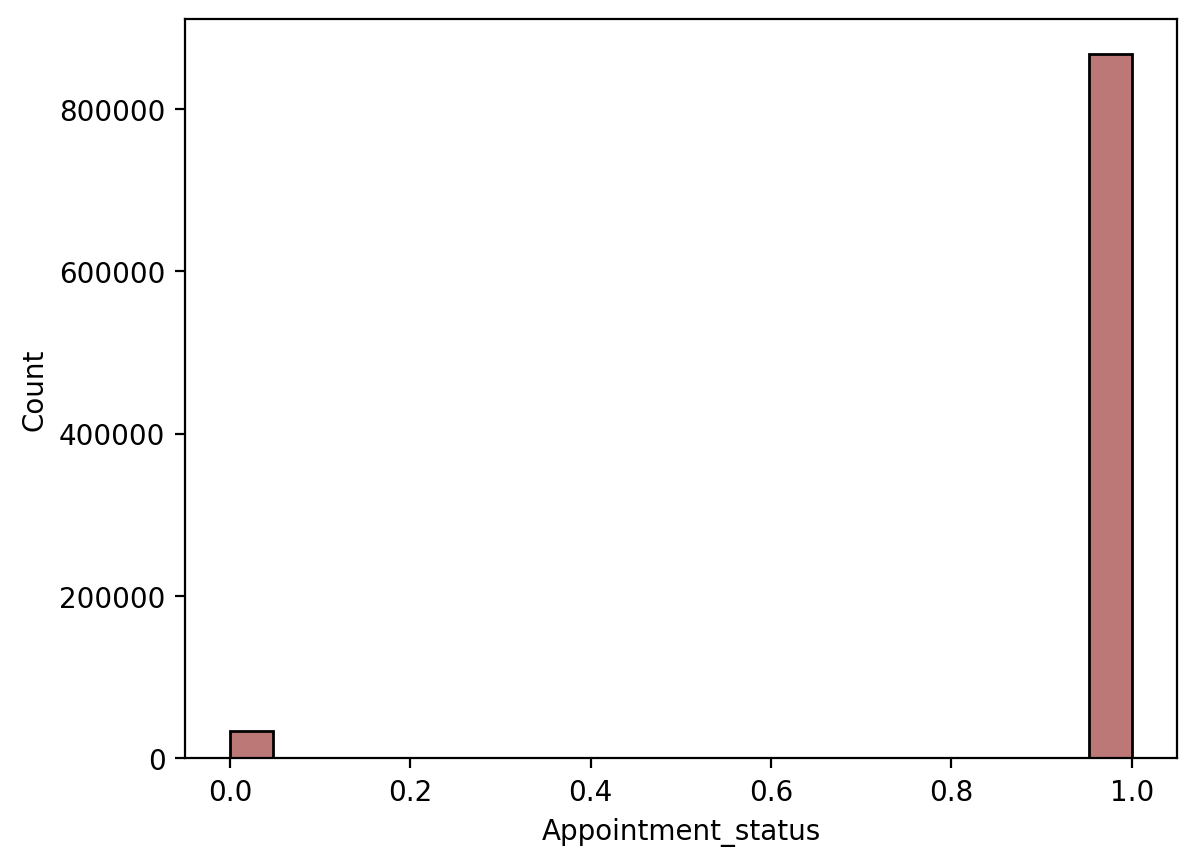

temp


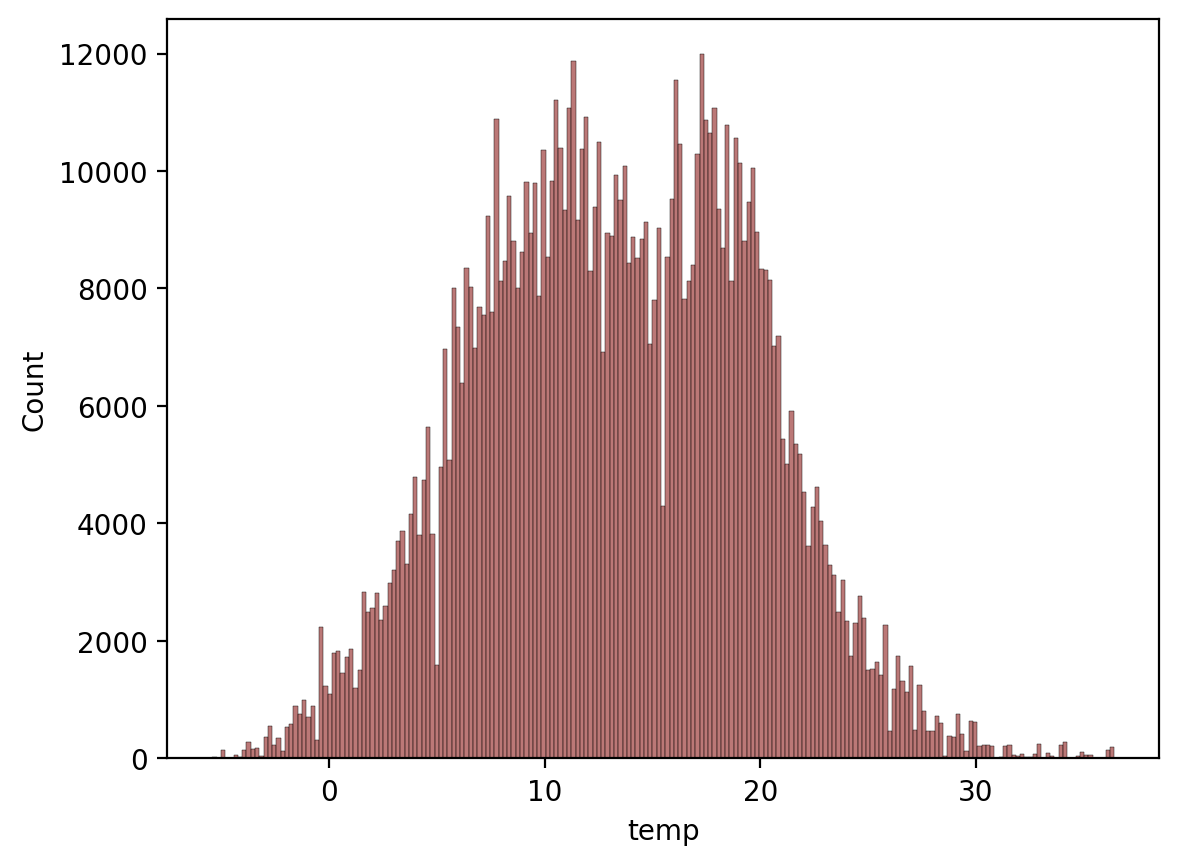

precipitation


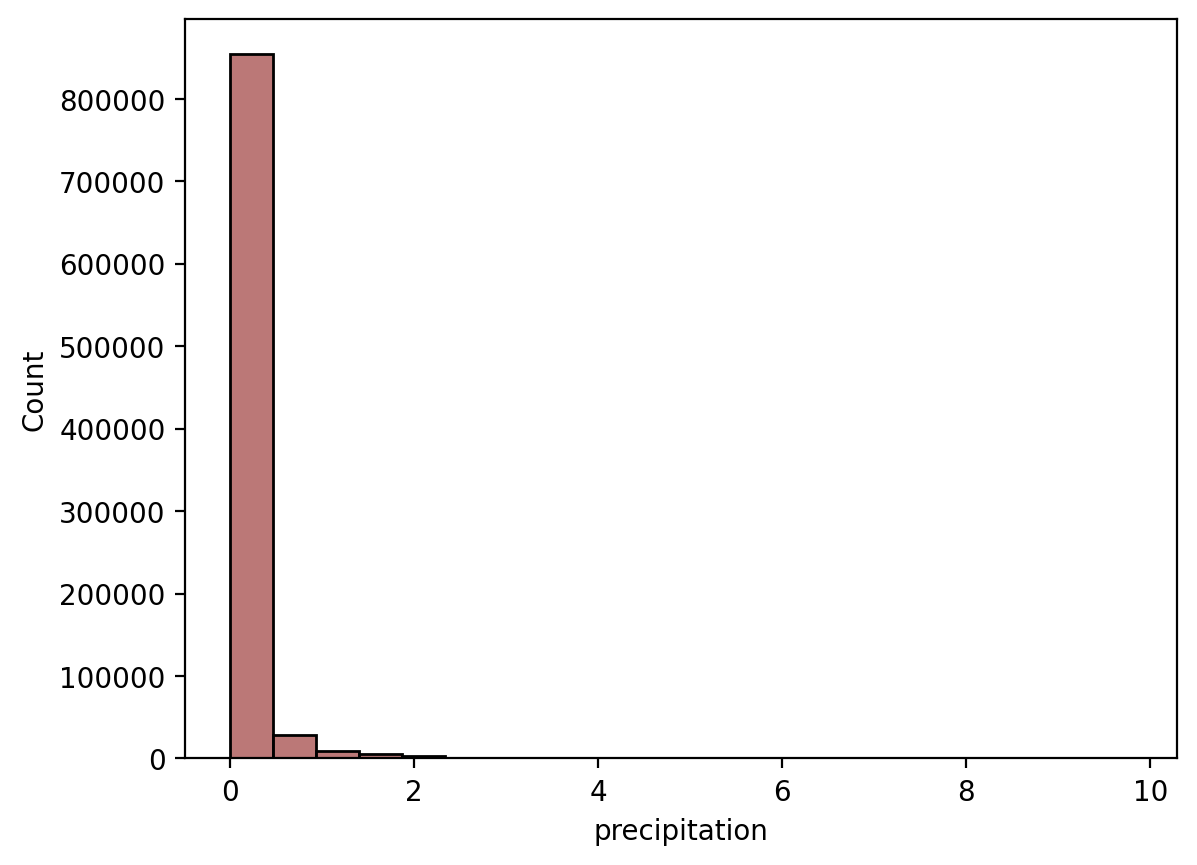

Age


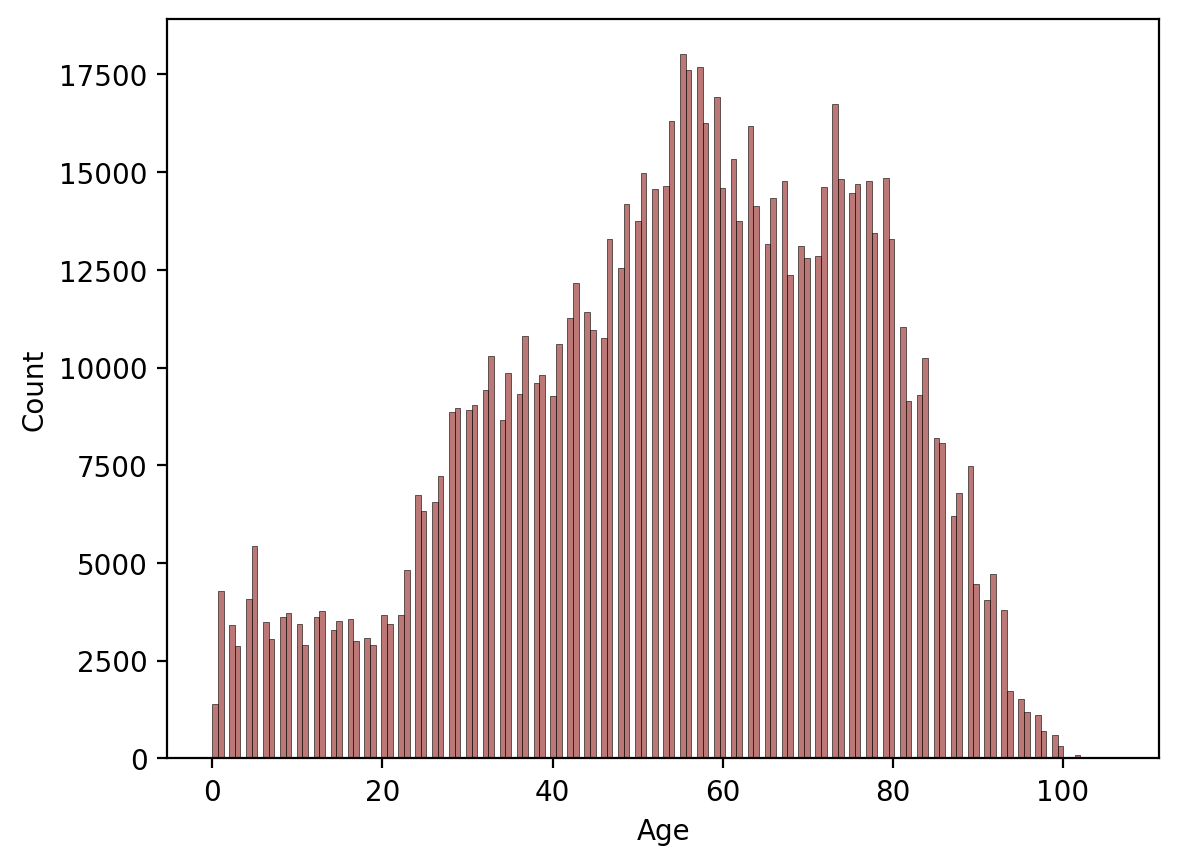

Sex


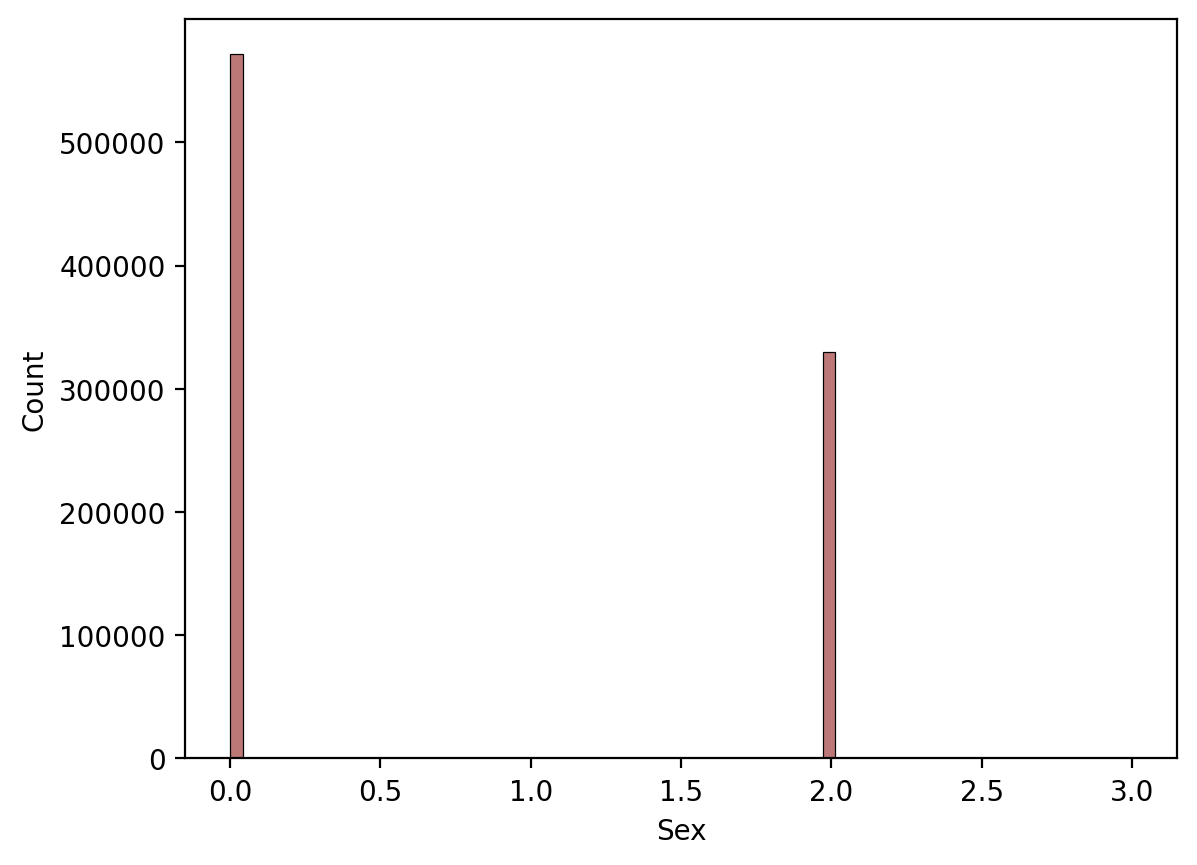

FRAILTY


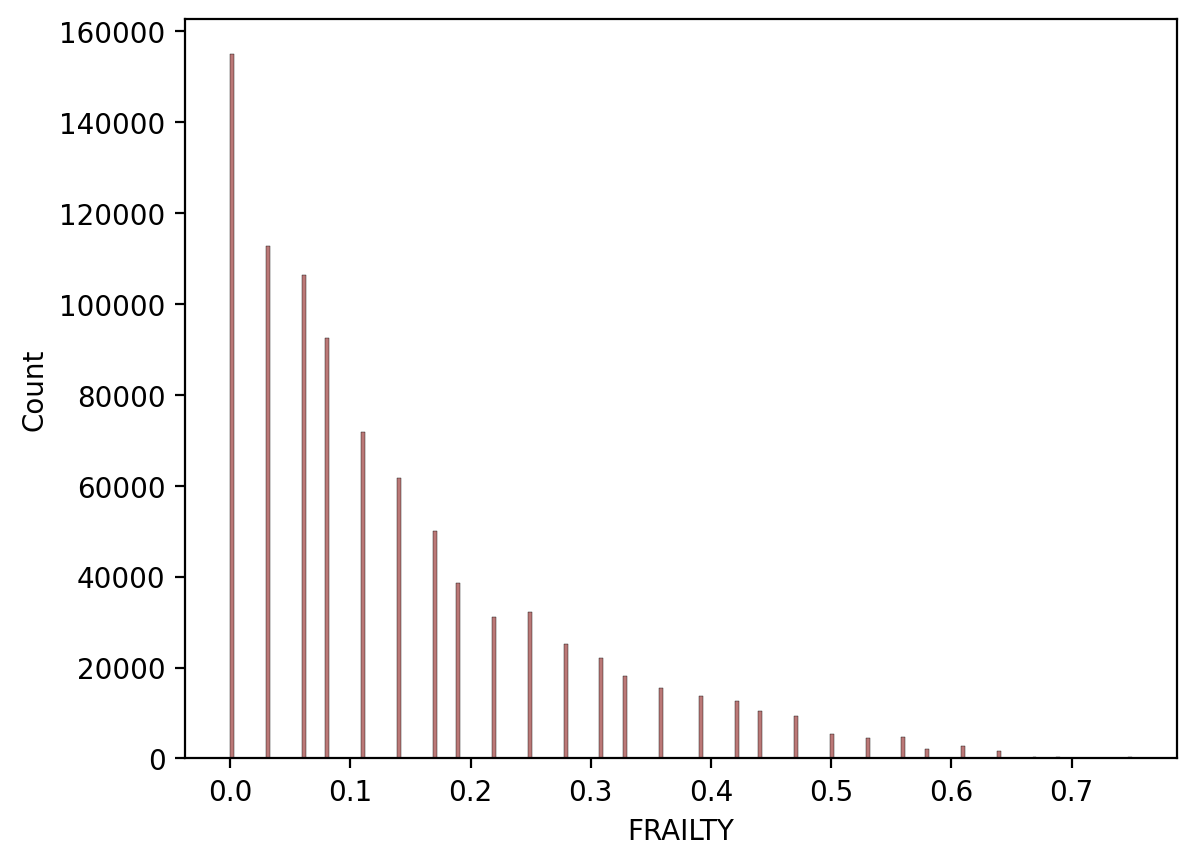

DEPRESSION


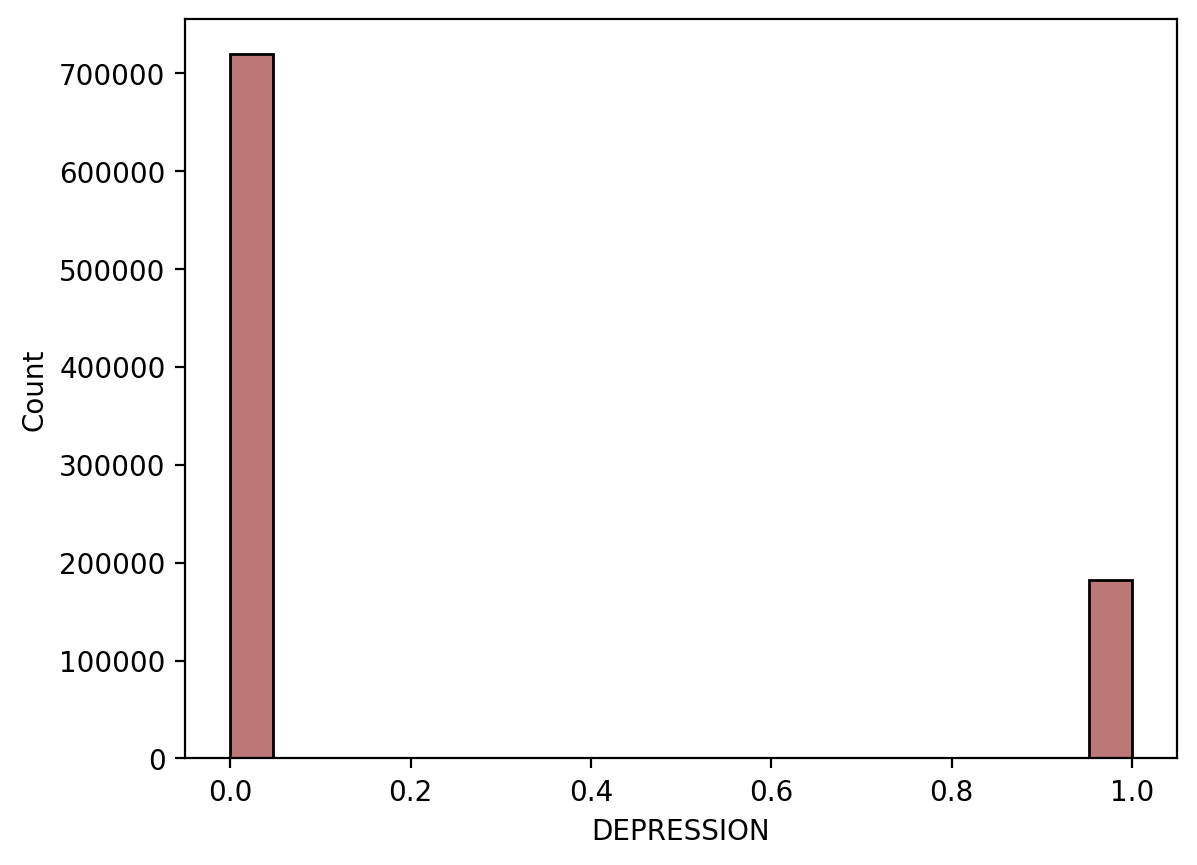

OBESITY


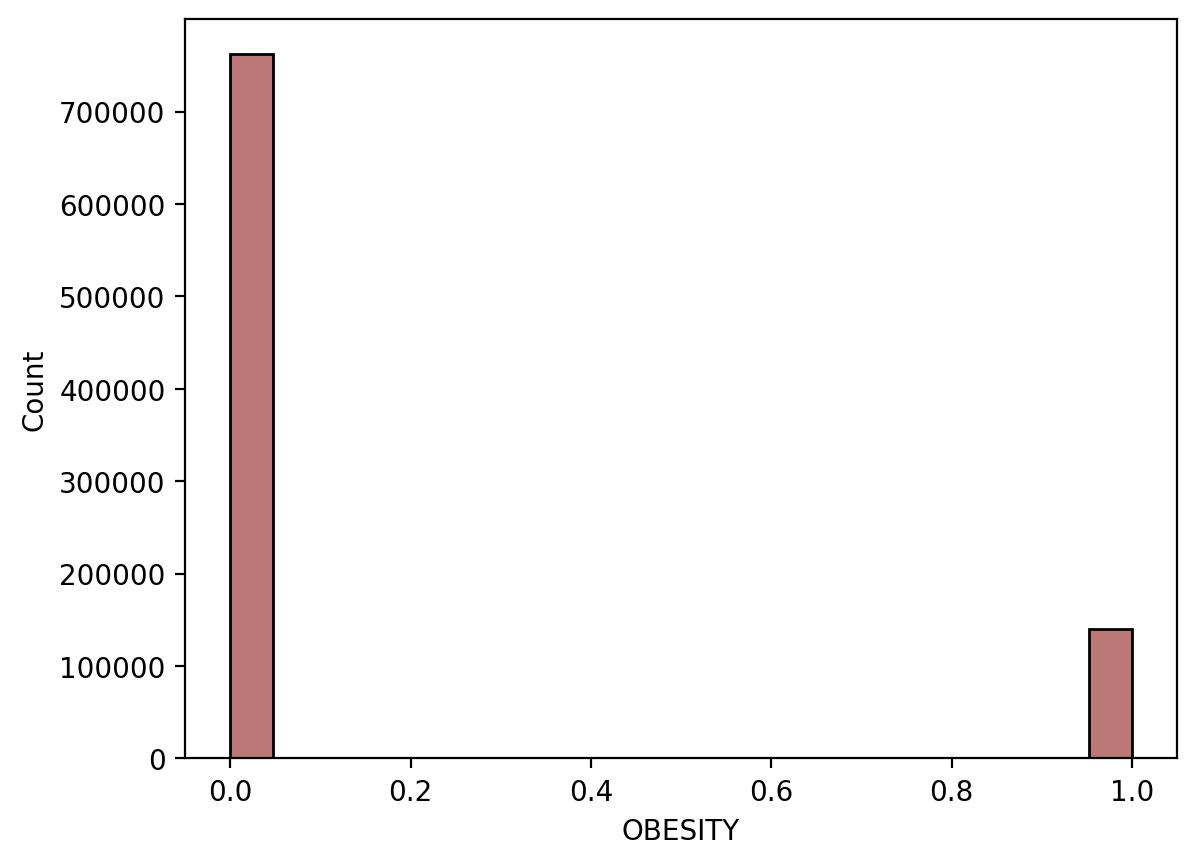

IHD


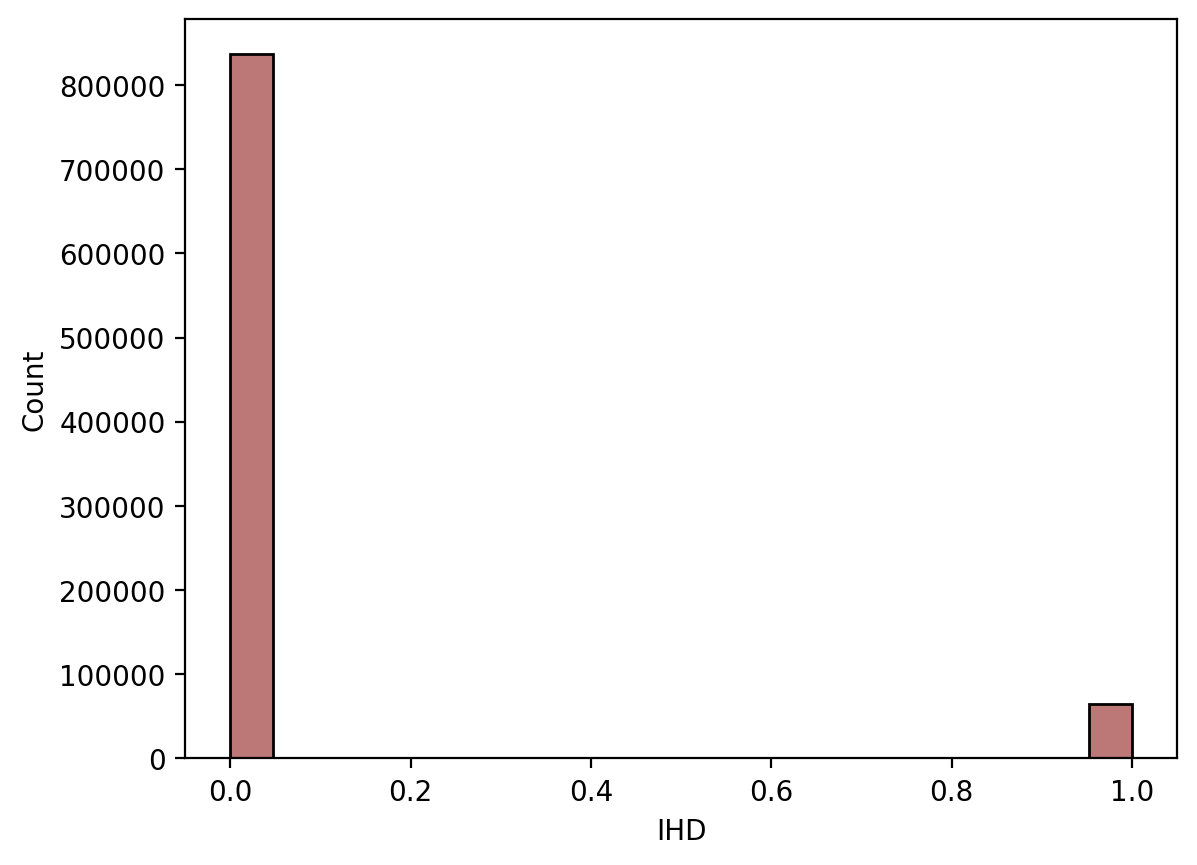

DM


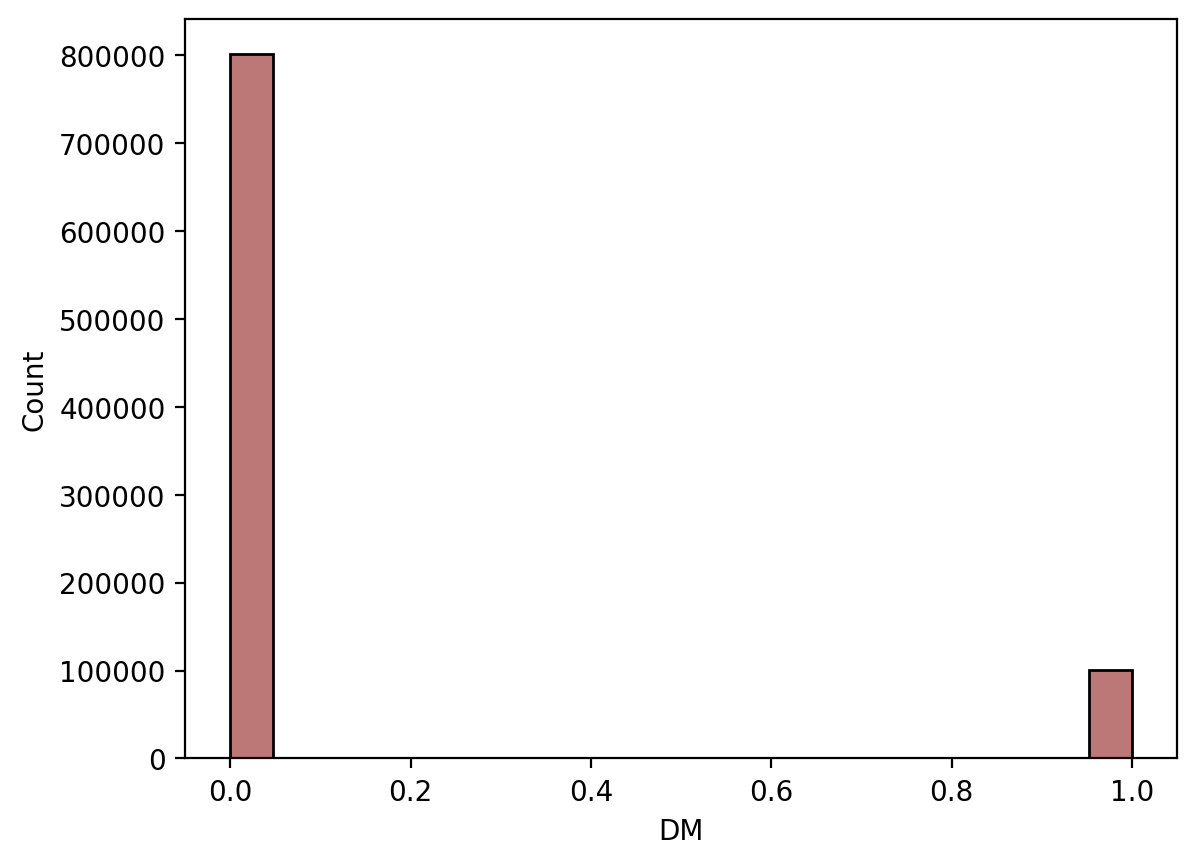

HPT


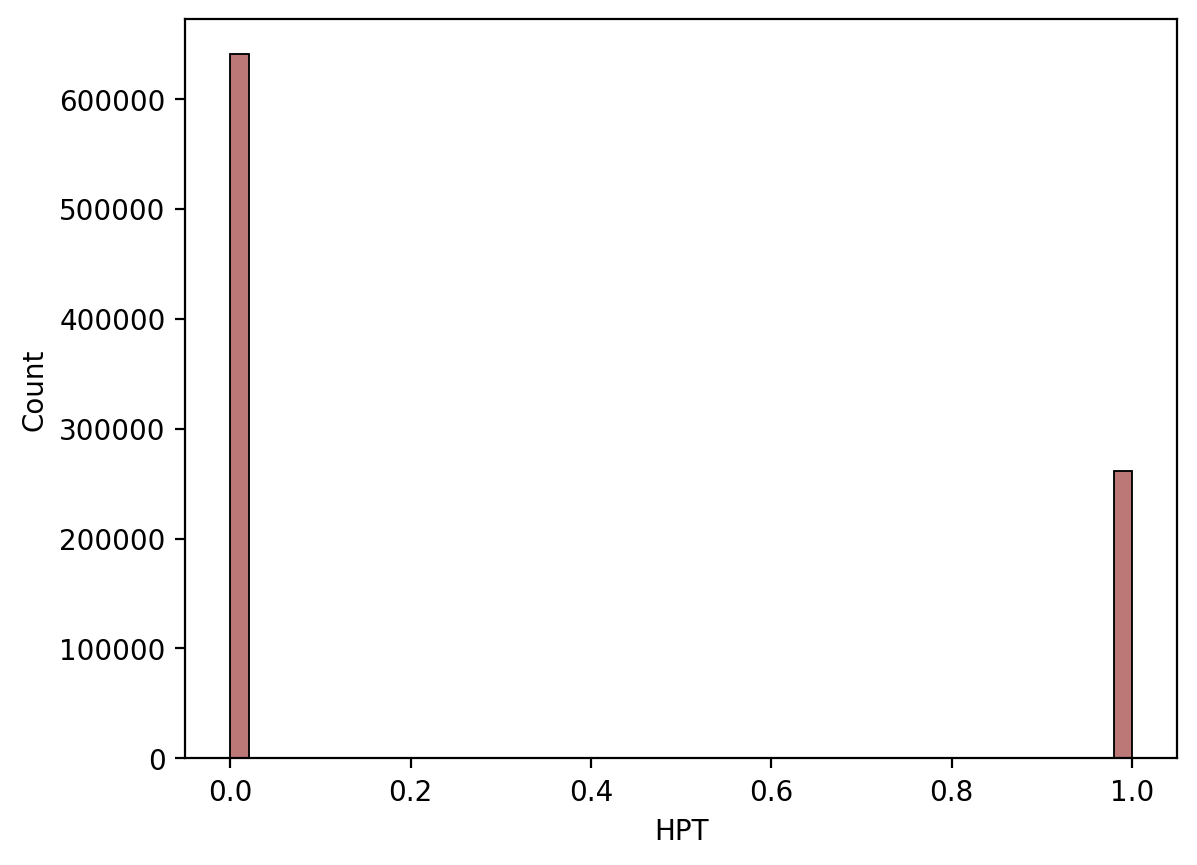

NDHG


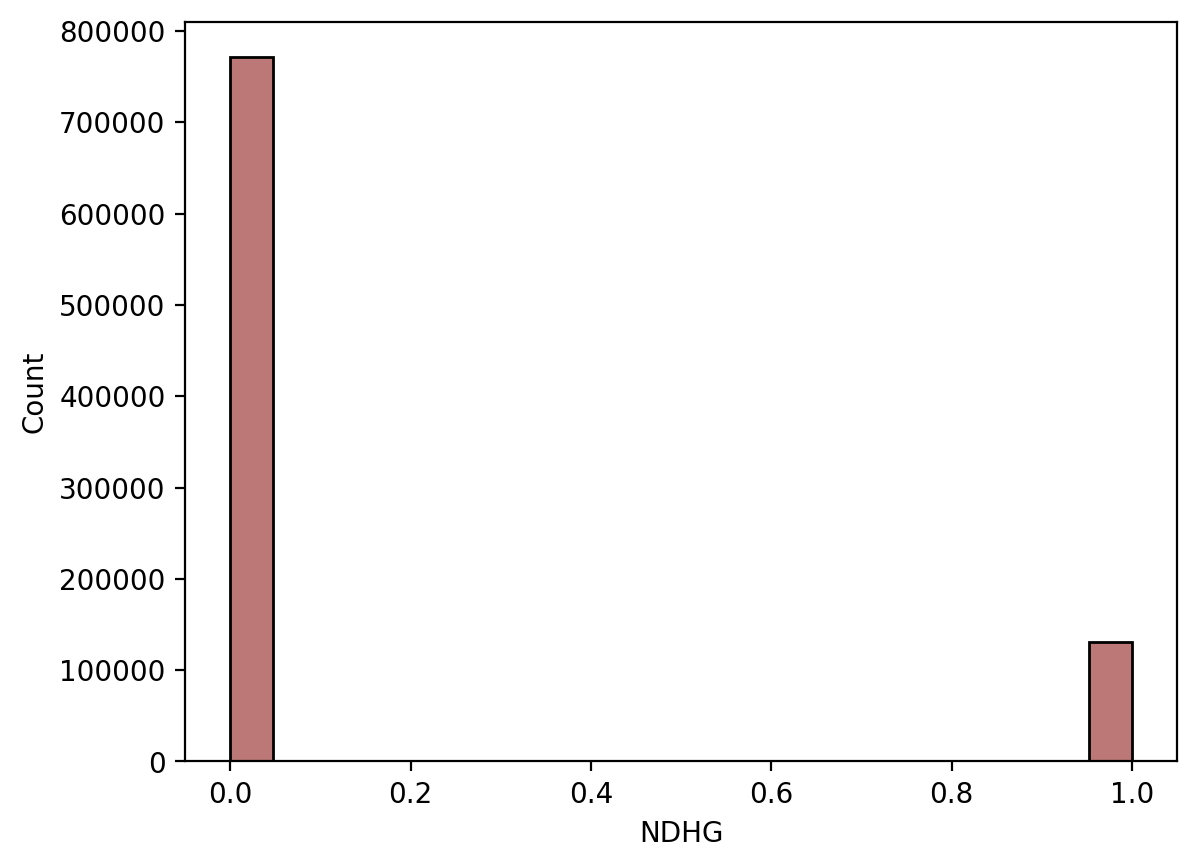

SMI


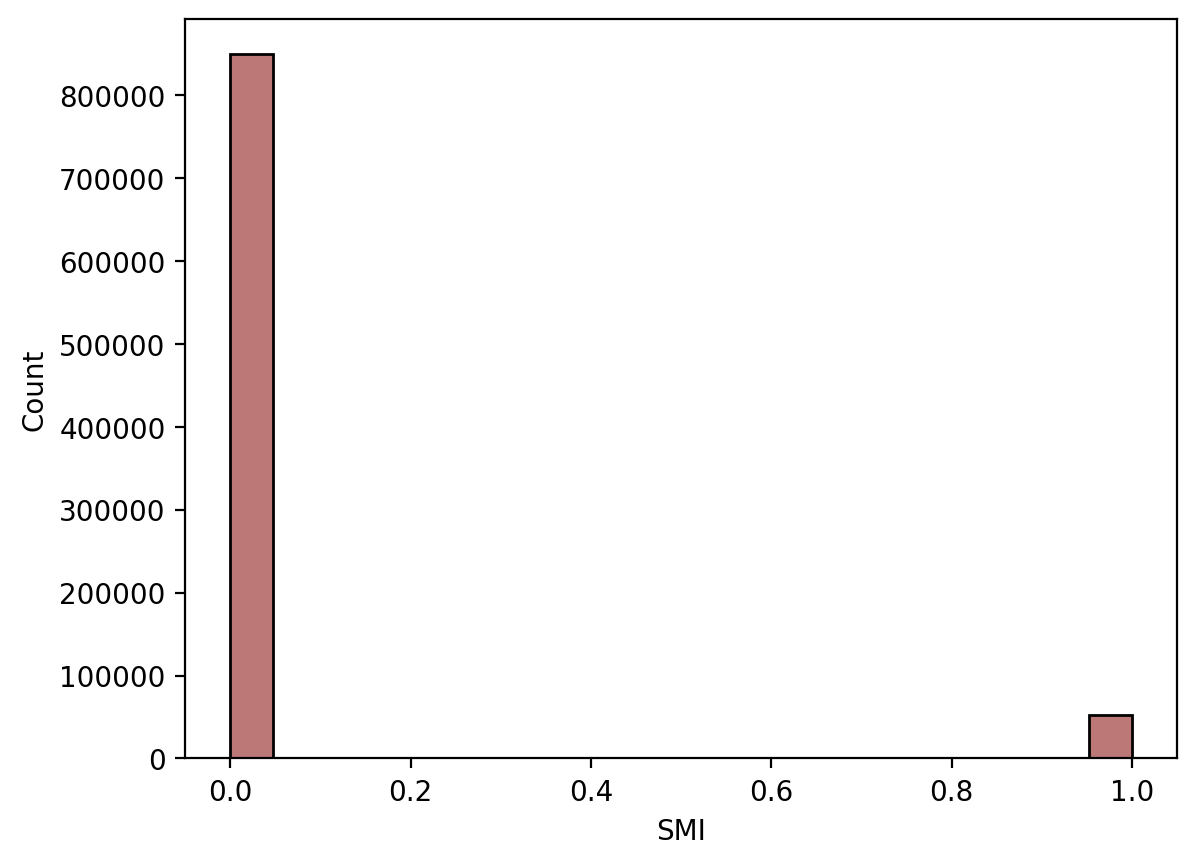

IMD2023


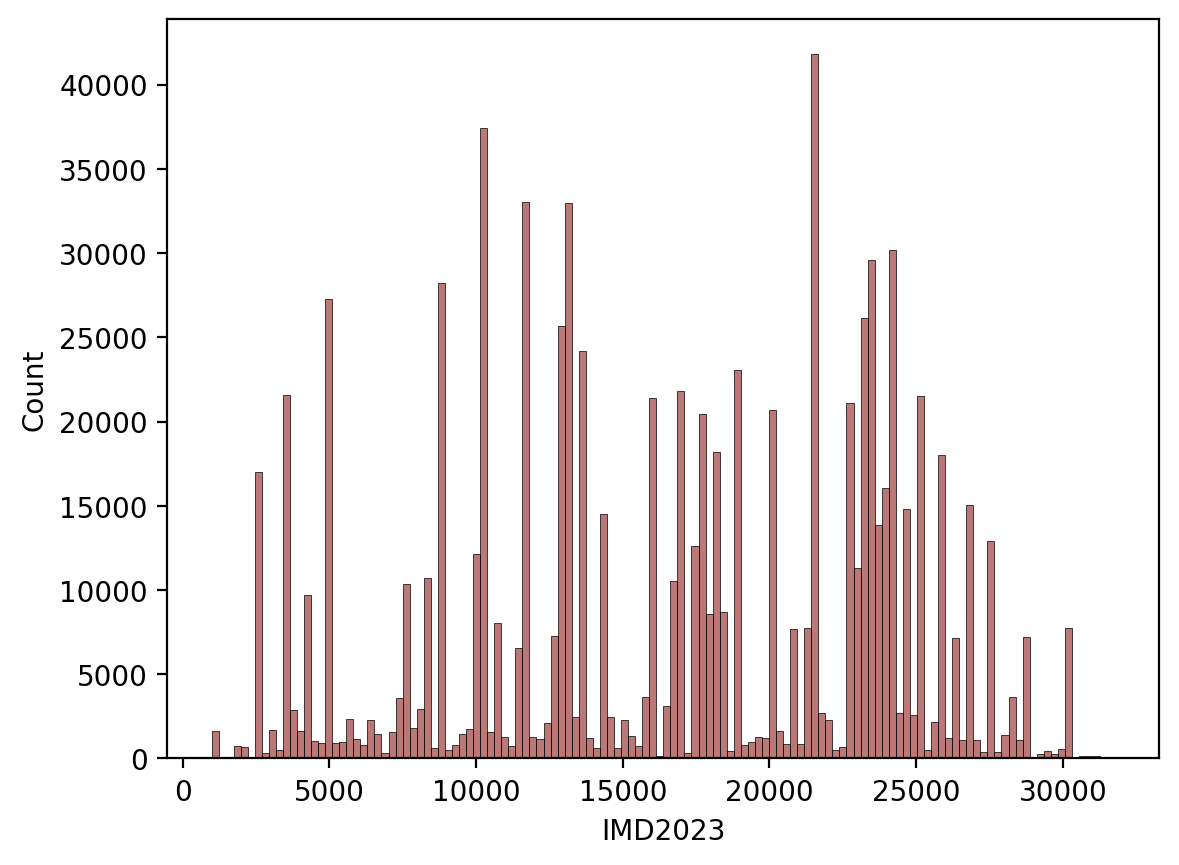

dist_to_station


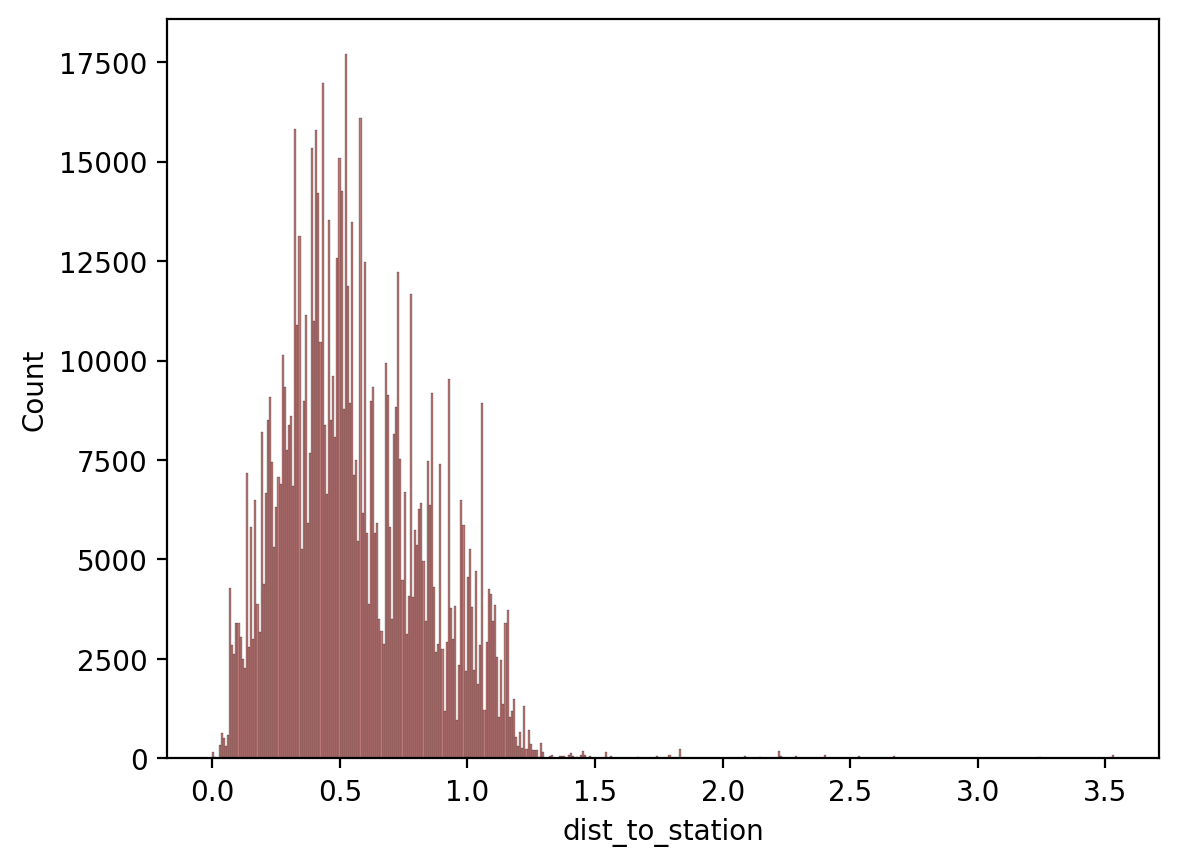

distance_to_surg


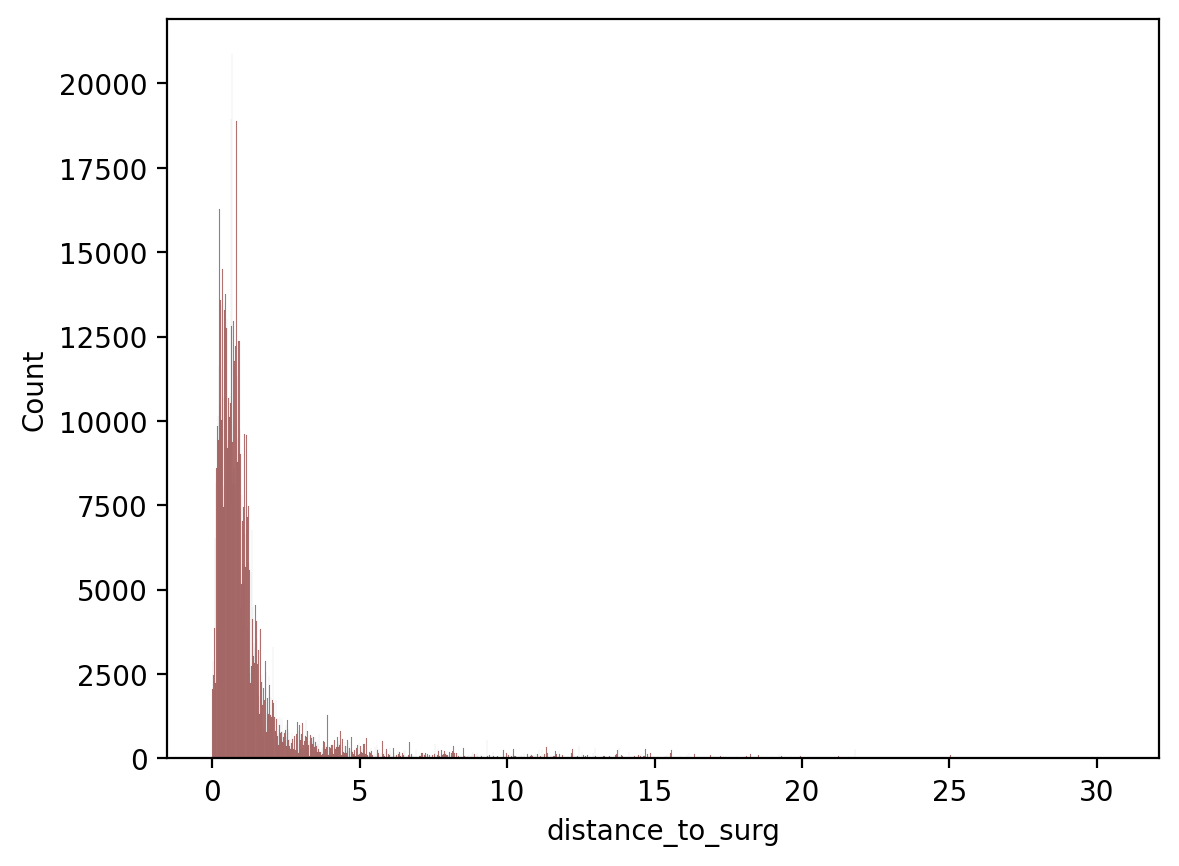

book_to_app_days


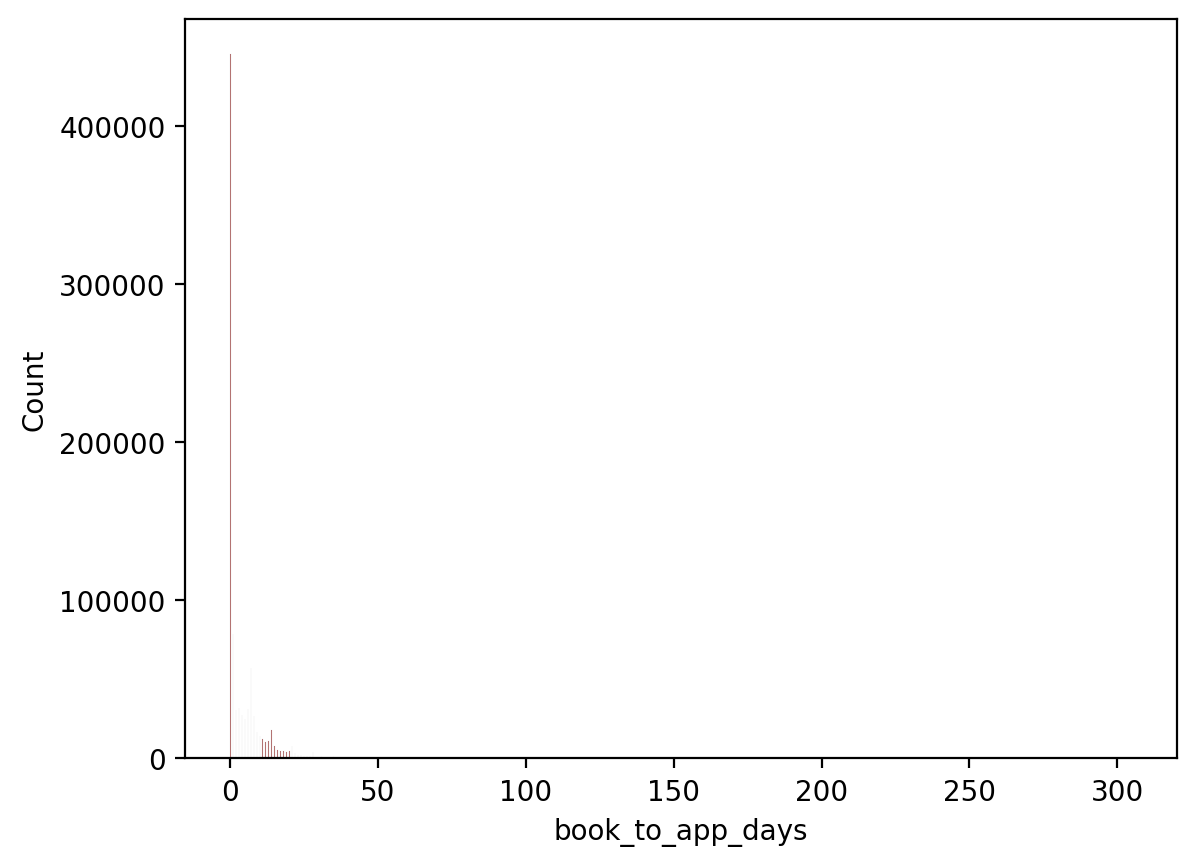

booked_by_clinician


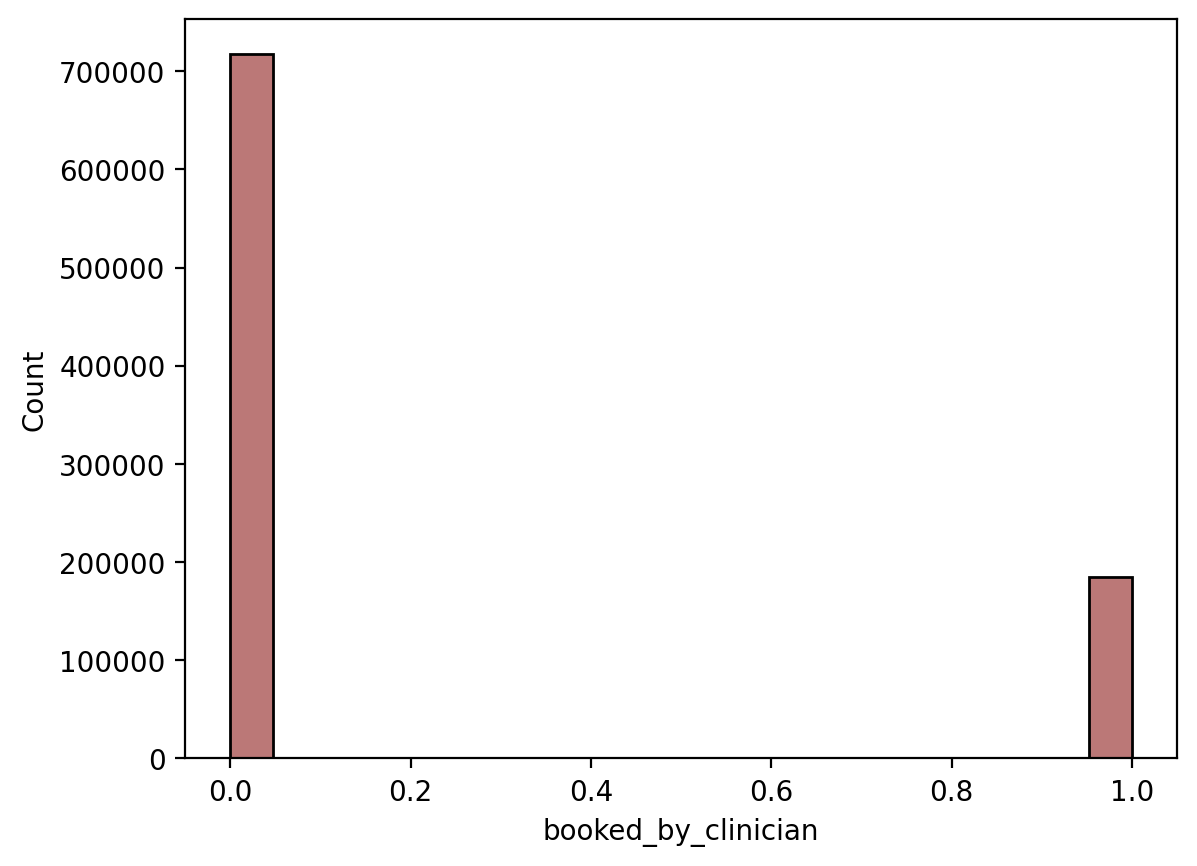

registered_for_months


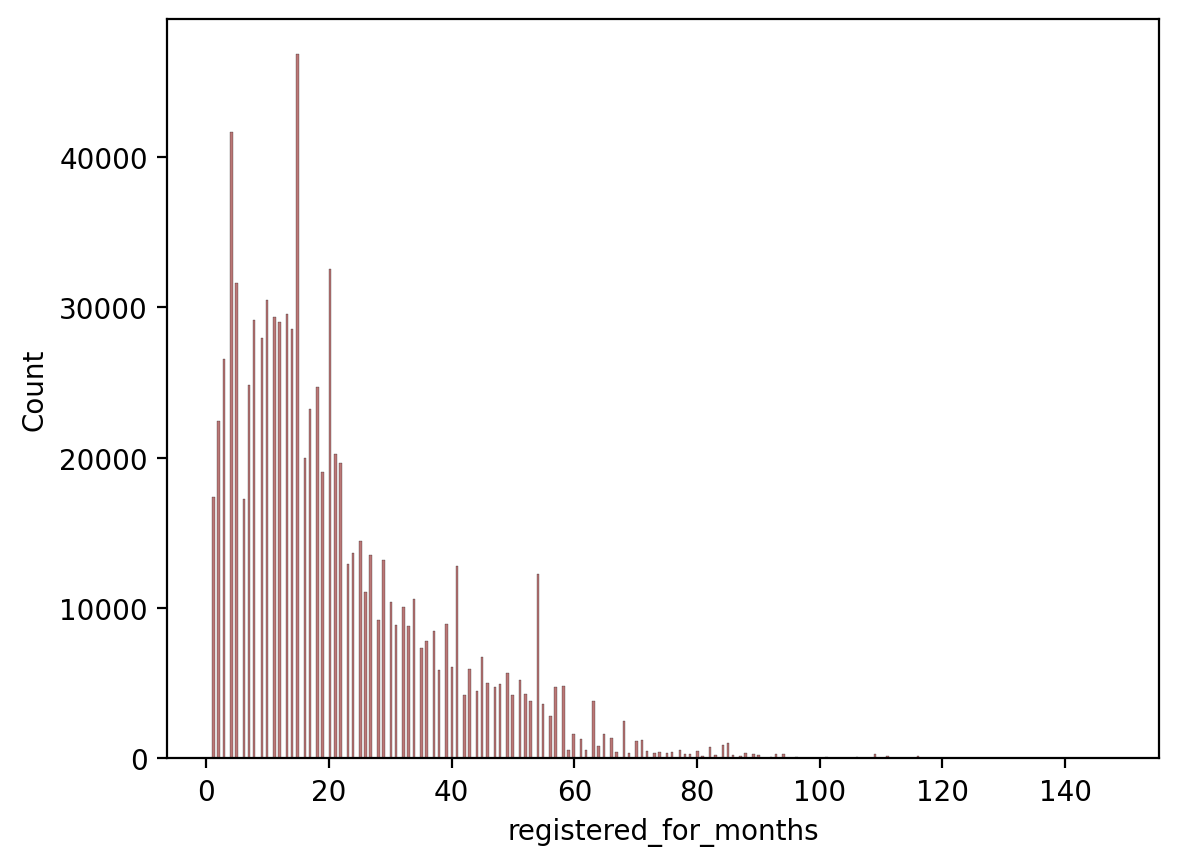

sin_week


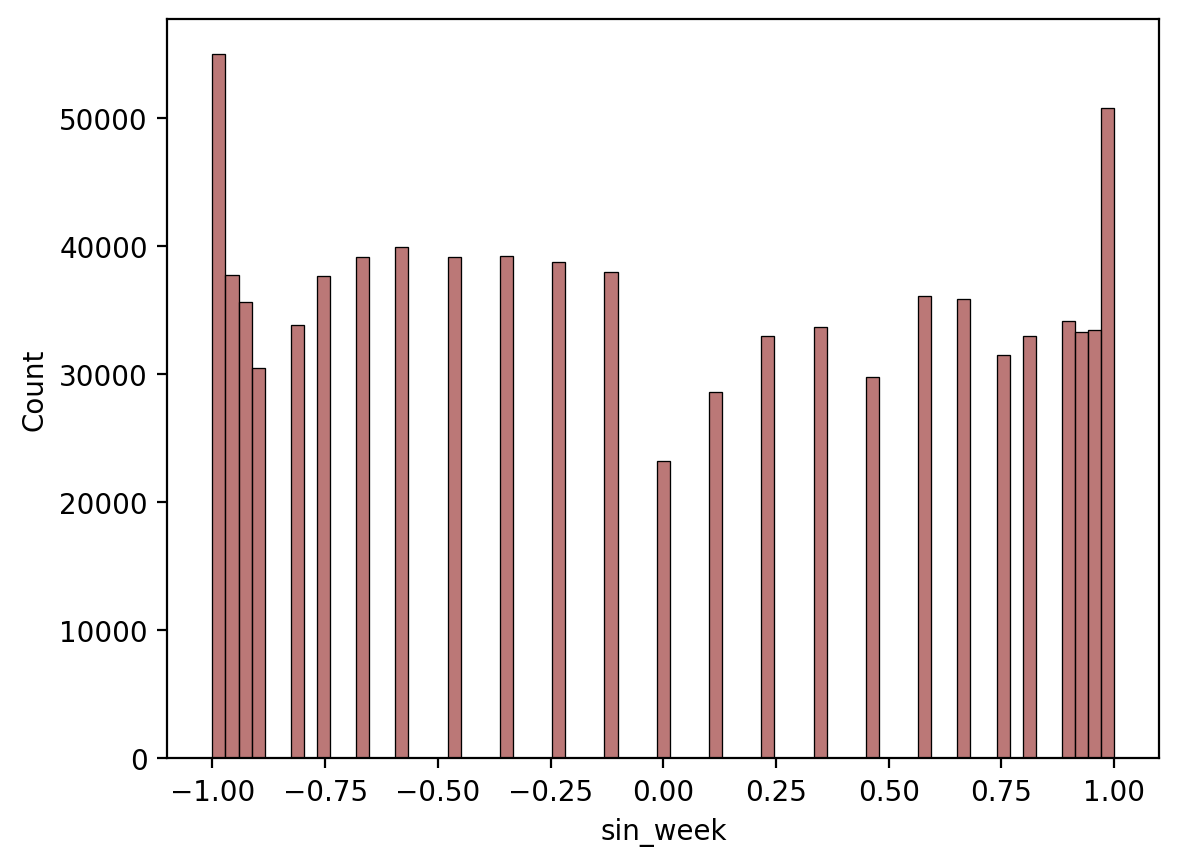

cos_week


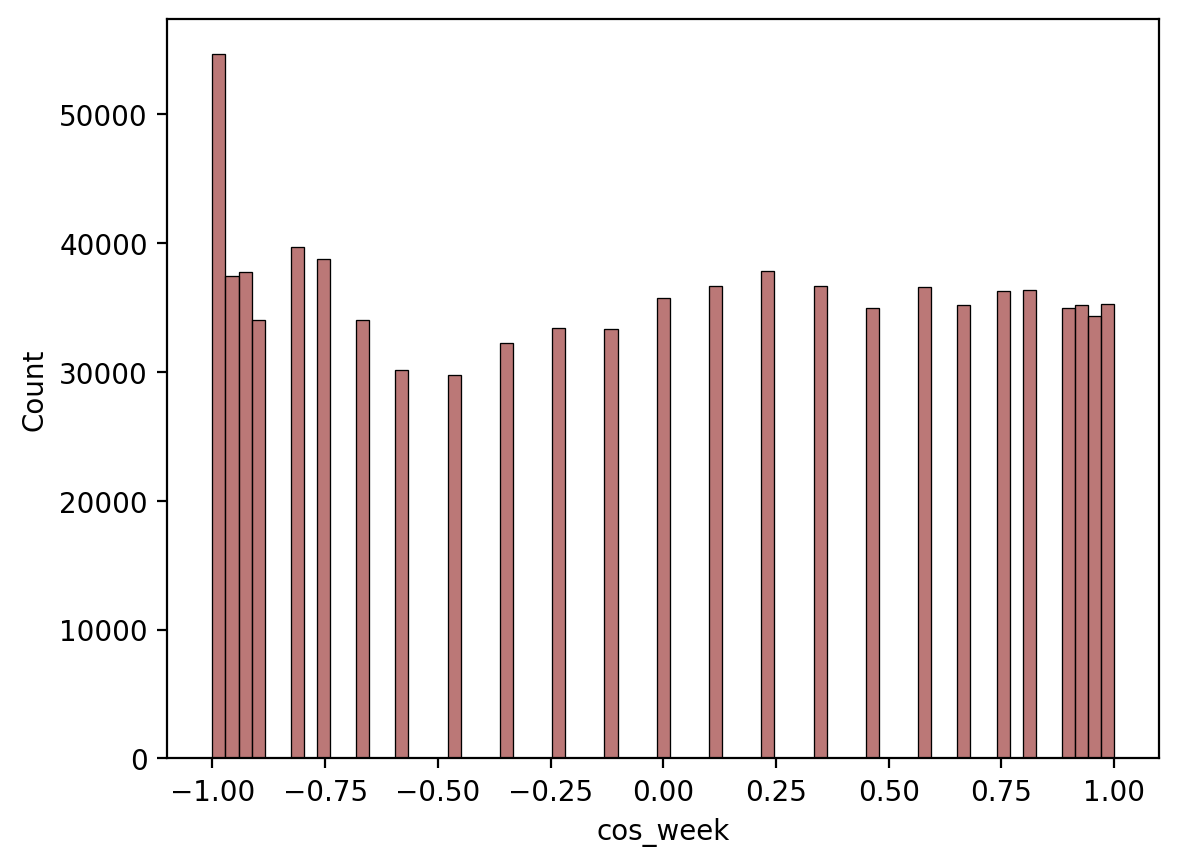

sin_Appointment_time


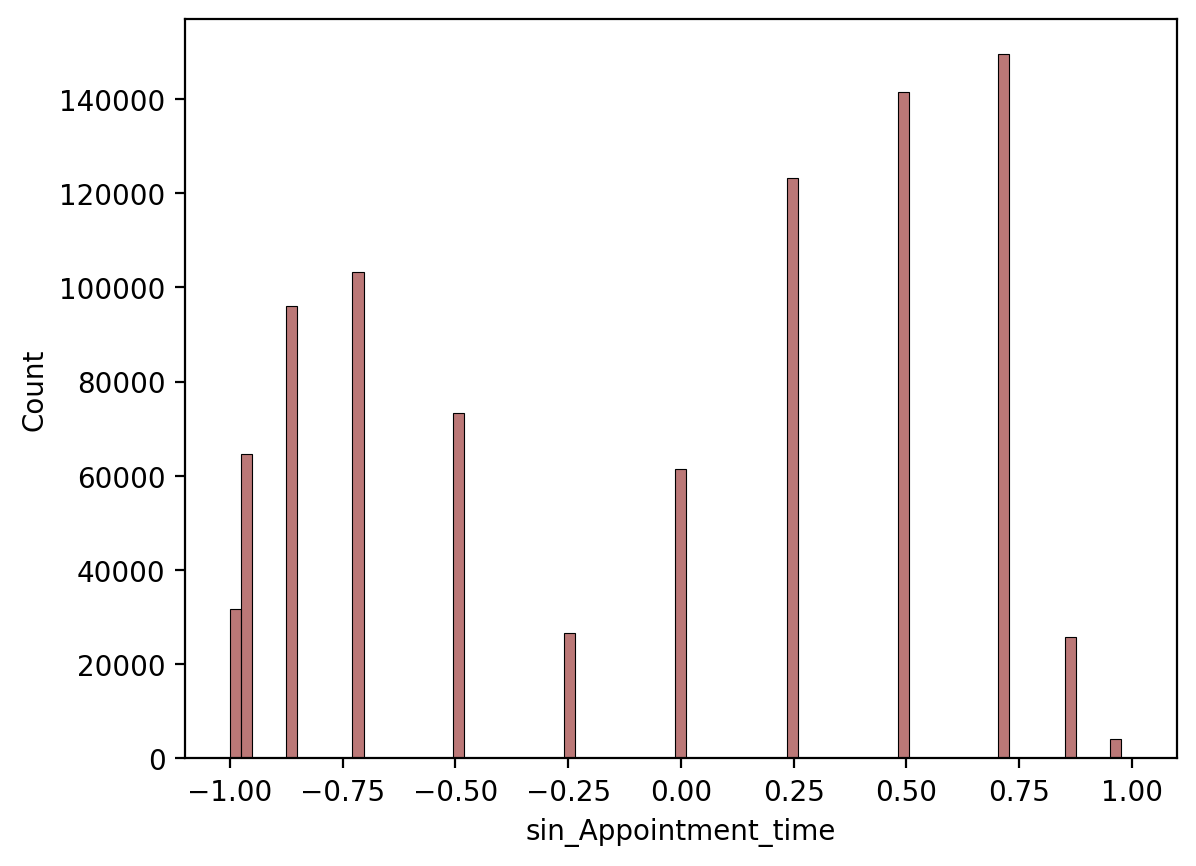

cos_Appointment_time


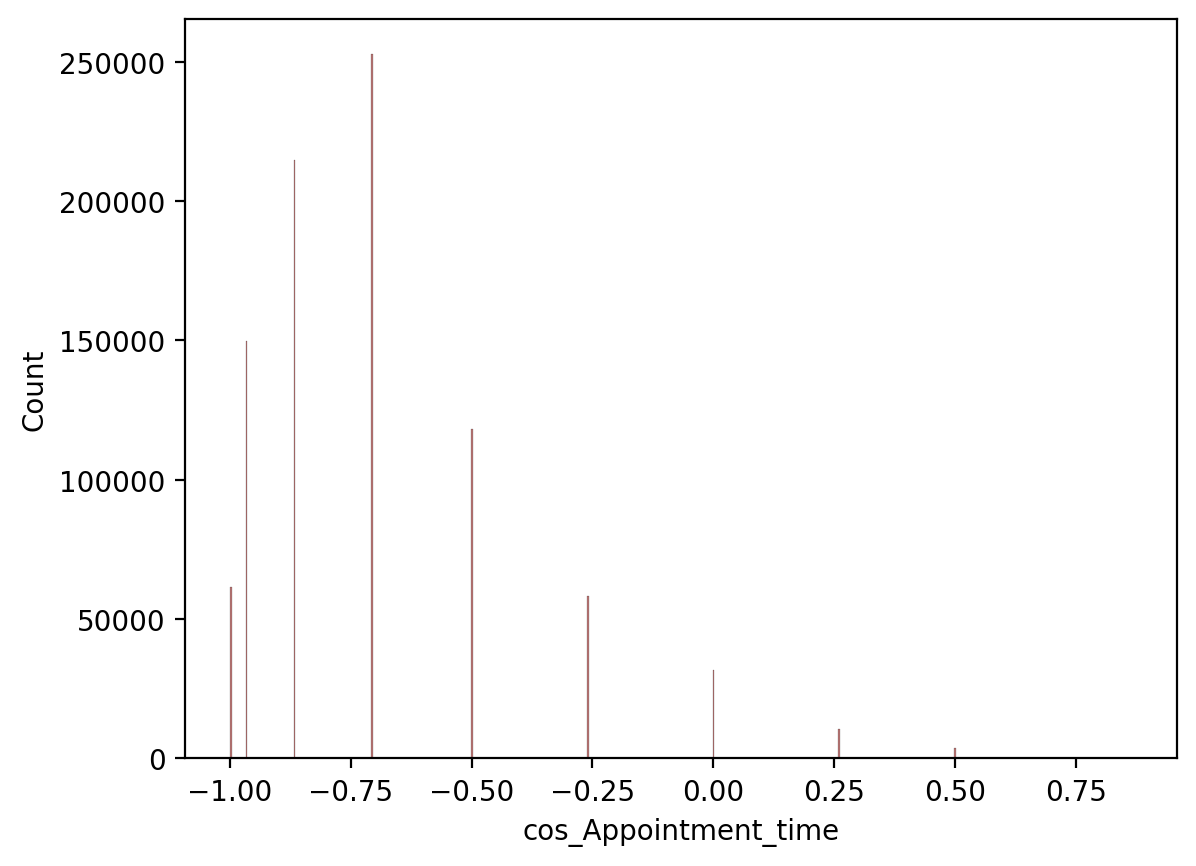

sin_month


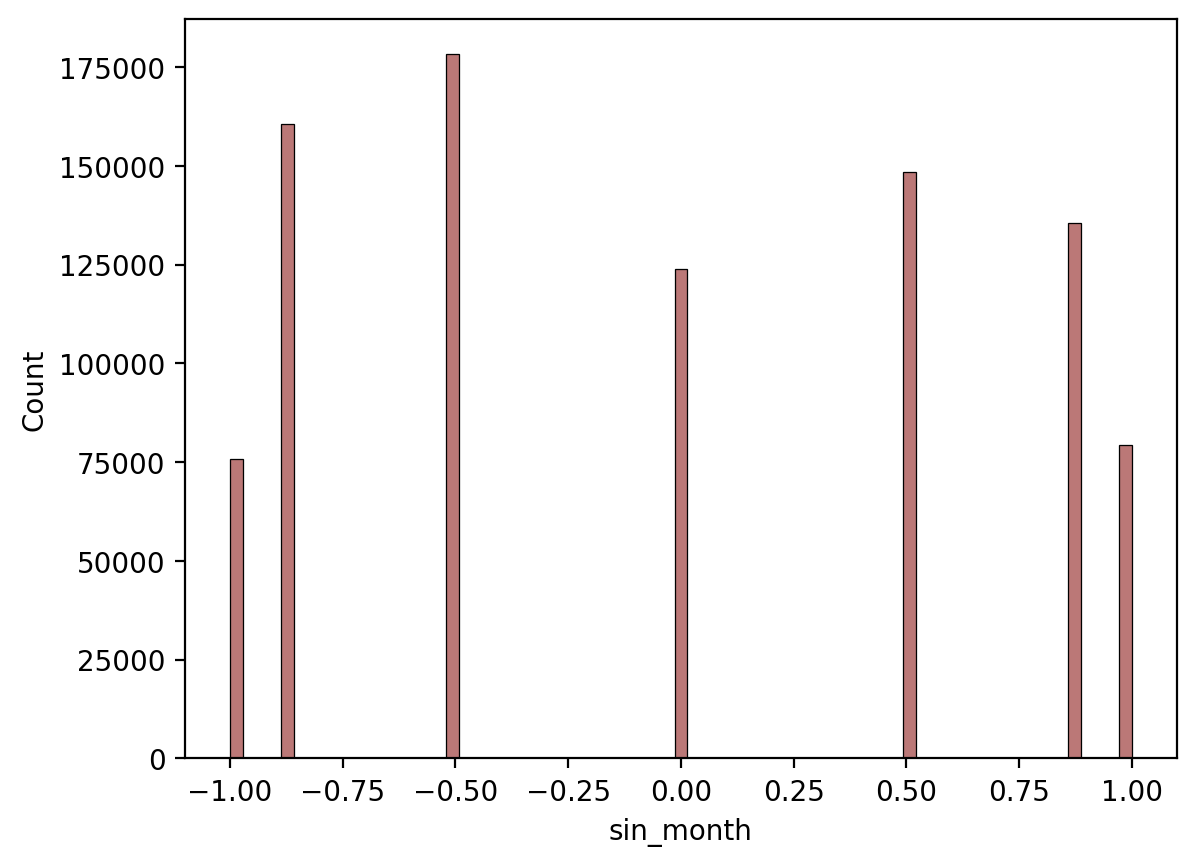

cos_month


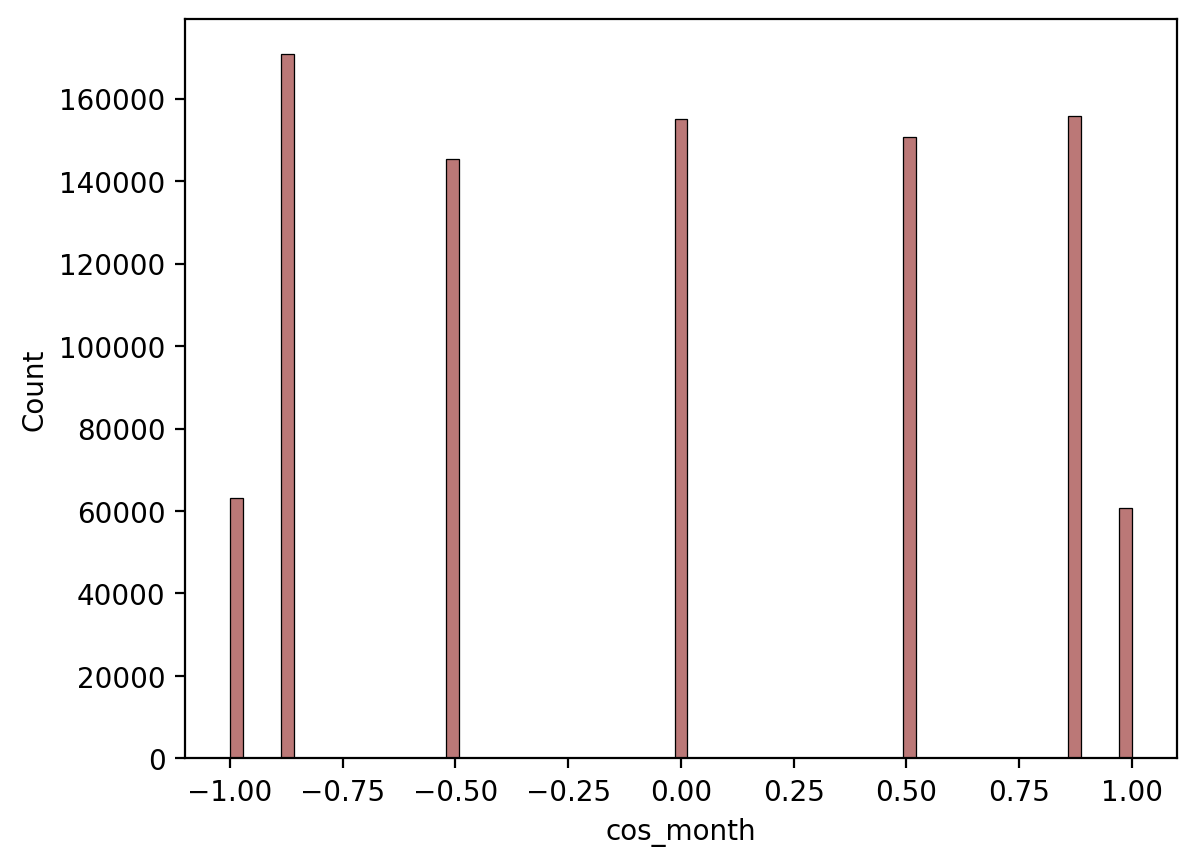

sin_day_of_week


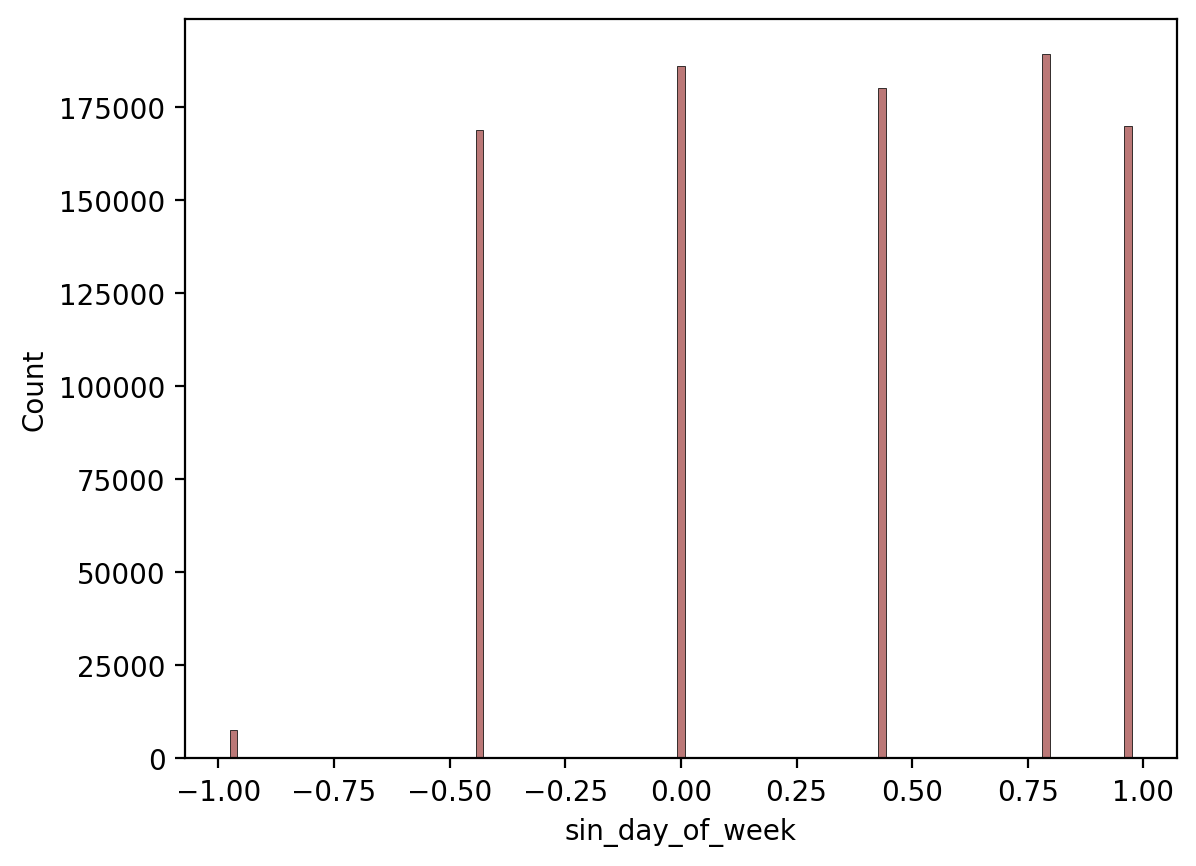

cos_day_of_week


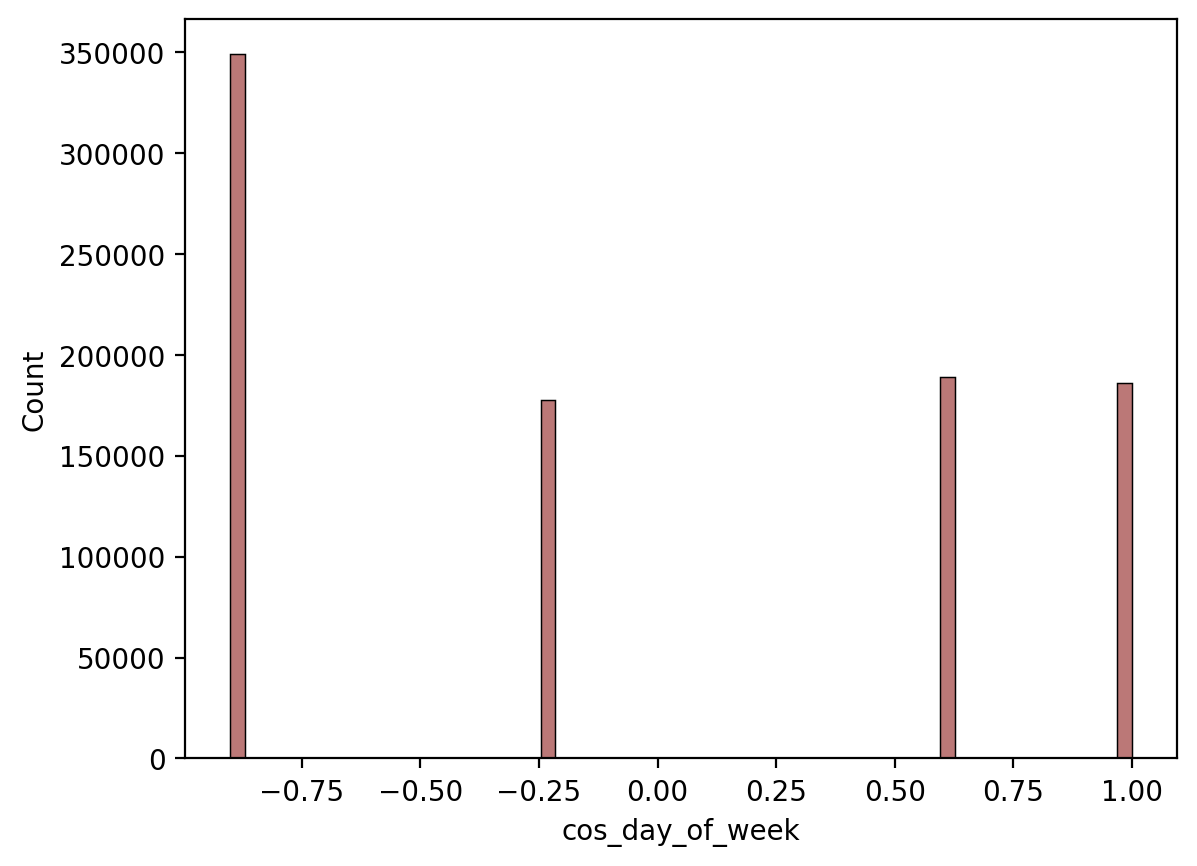

No_shows


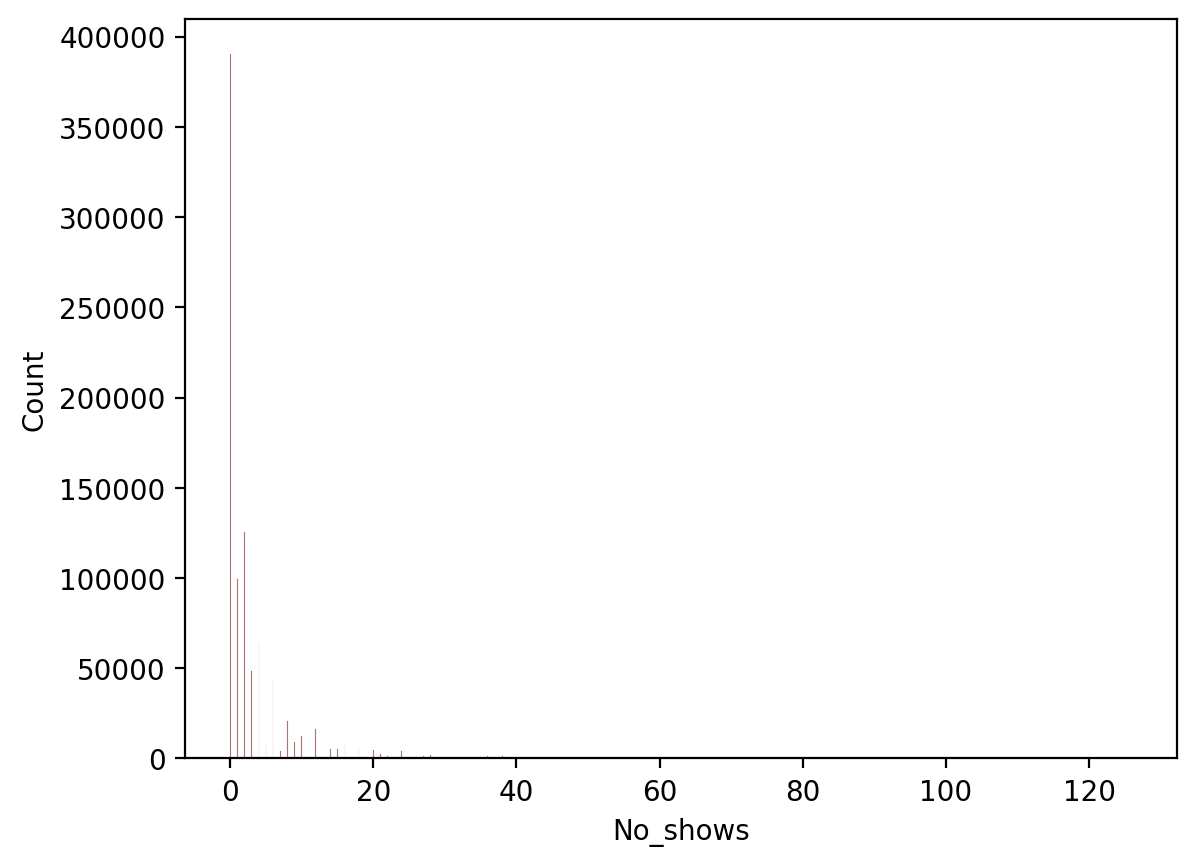

Rota_ARRS


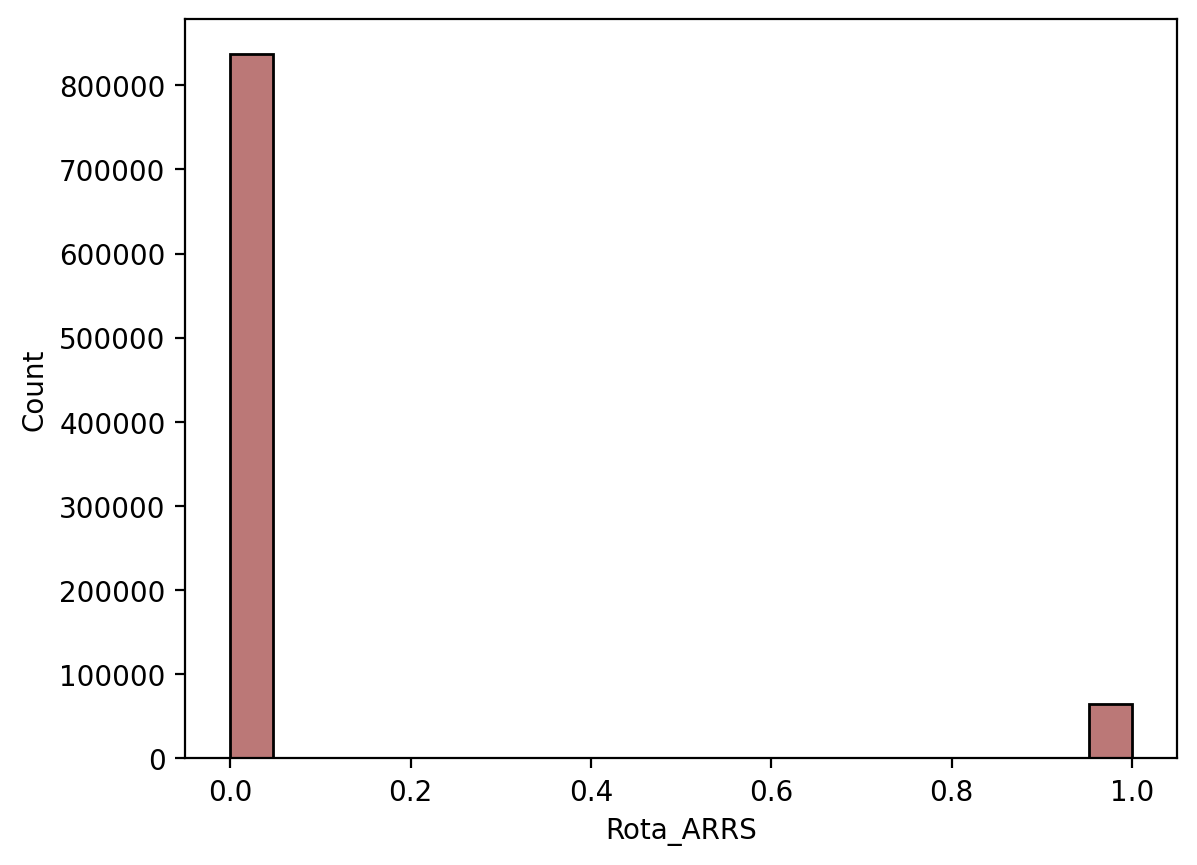

Rota_GP


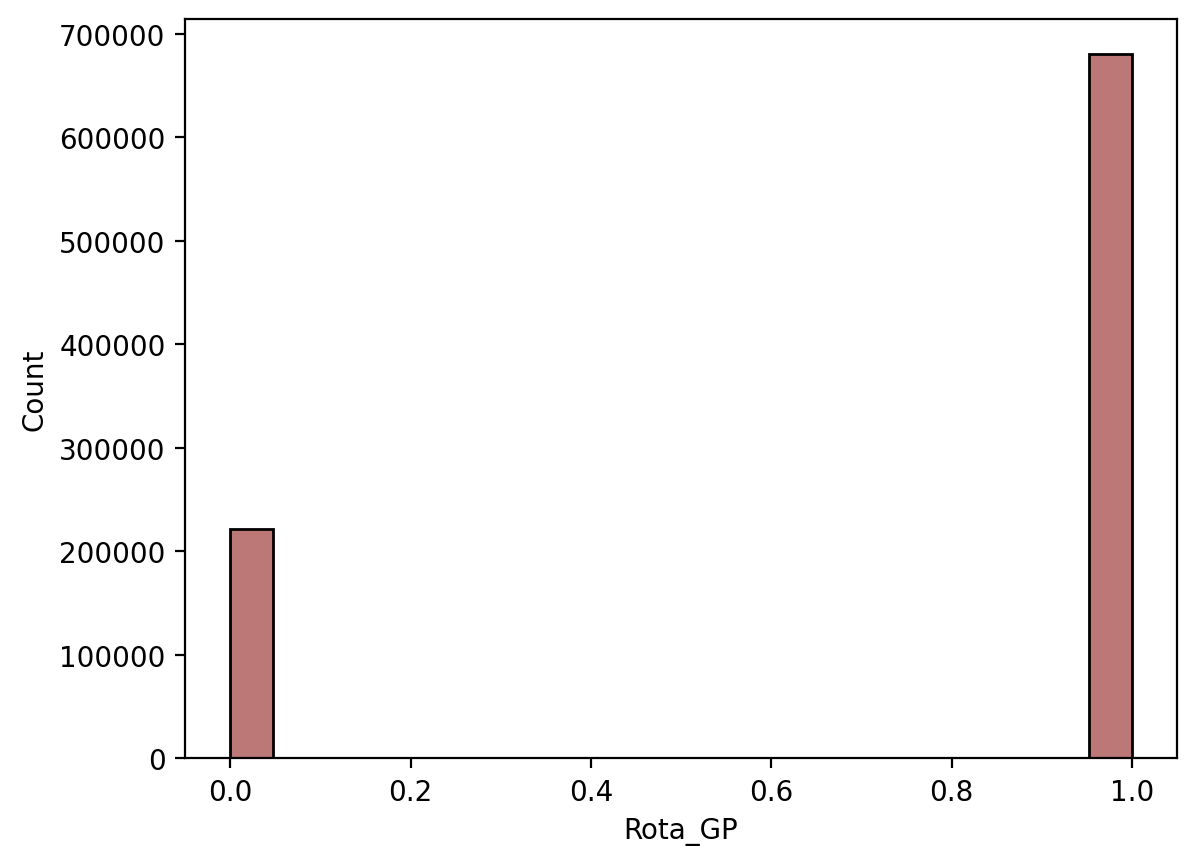

Rota_HCA


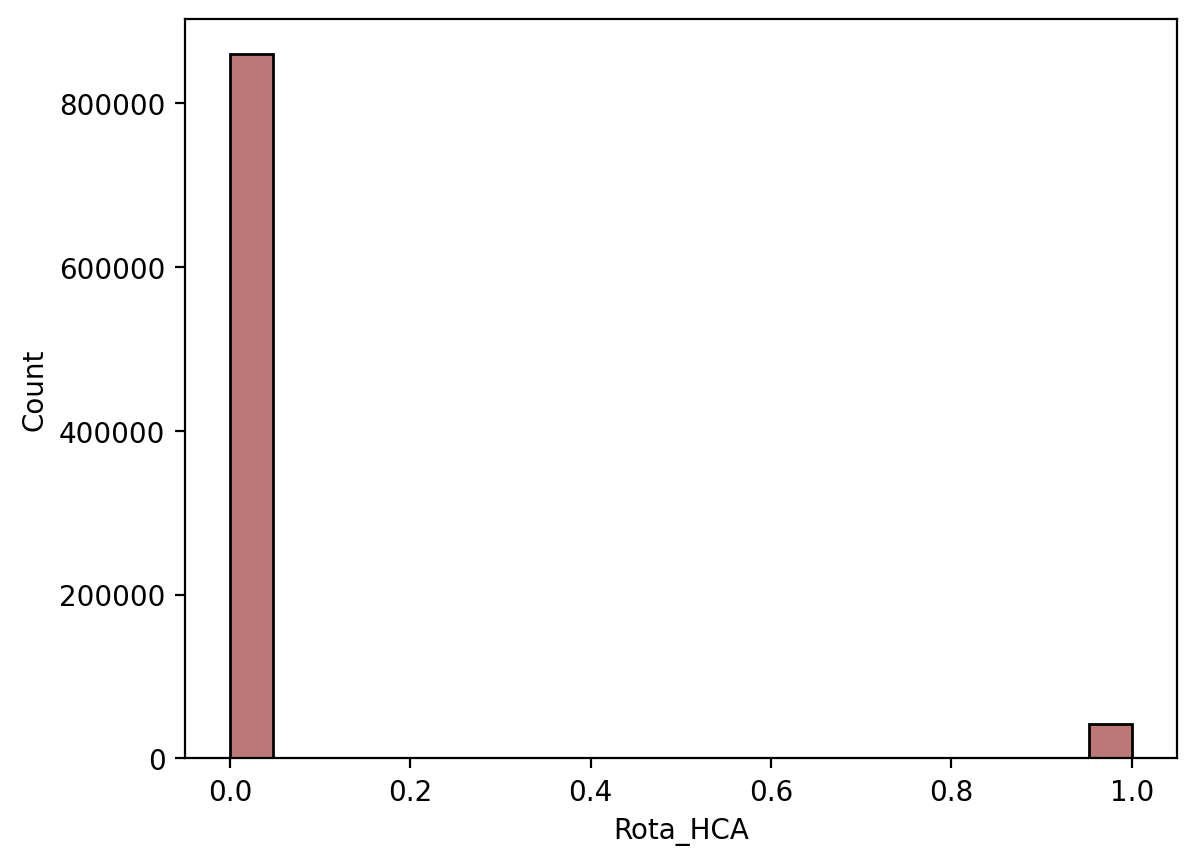

Rota_Nurse


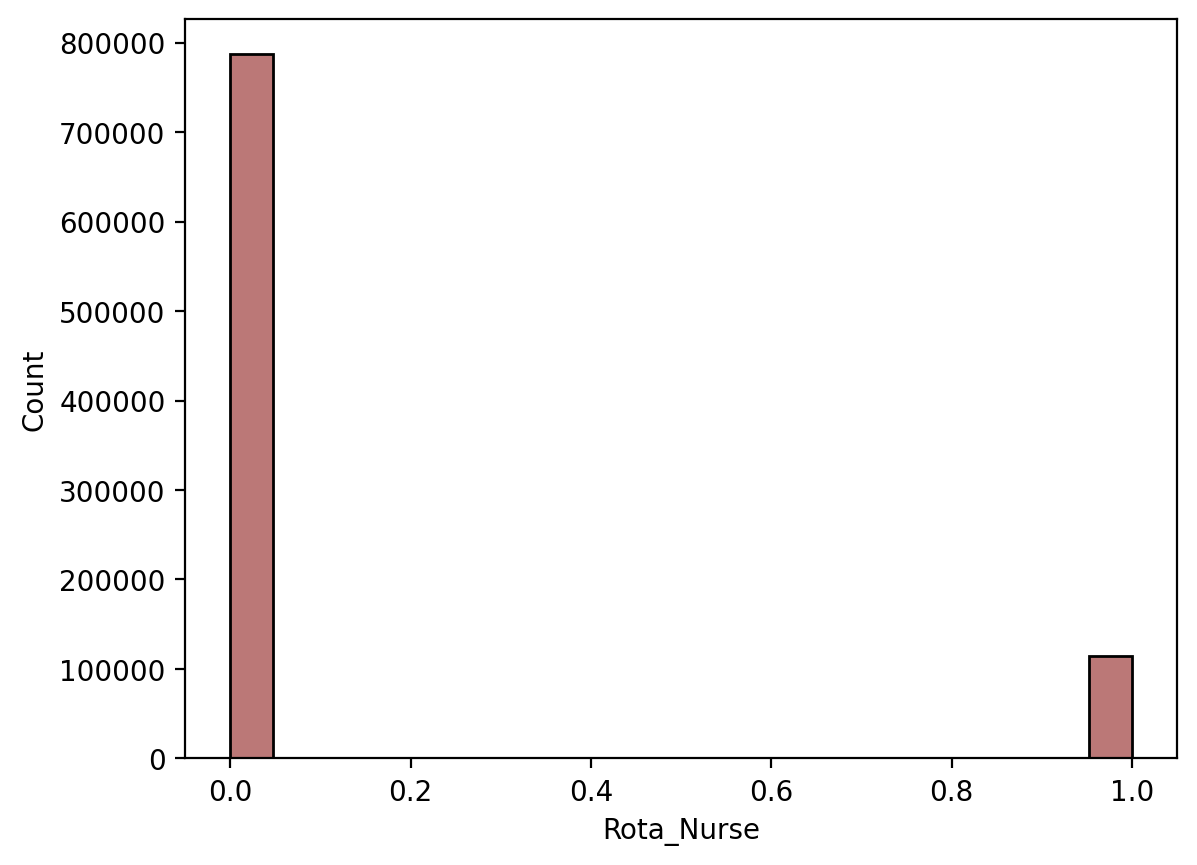

Ethnicity_Asian


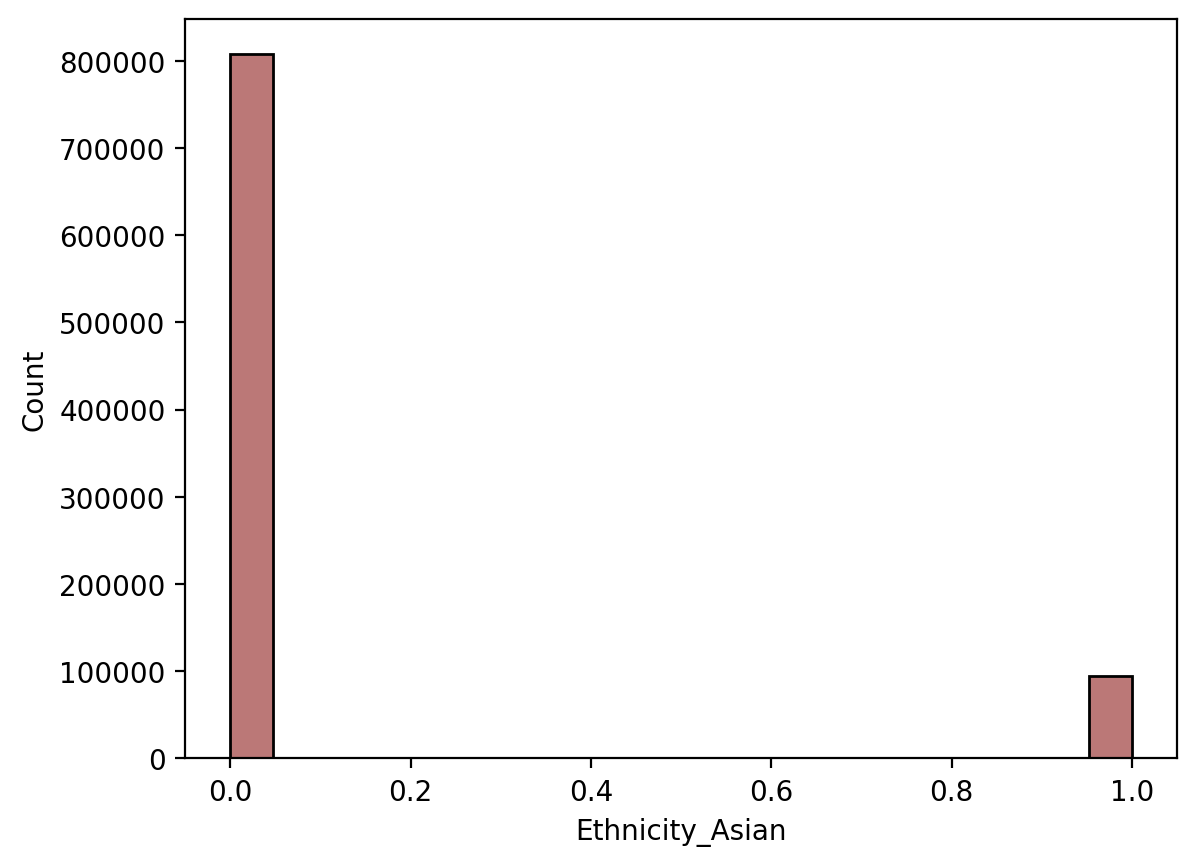

Ethnicity_Black


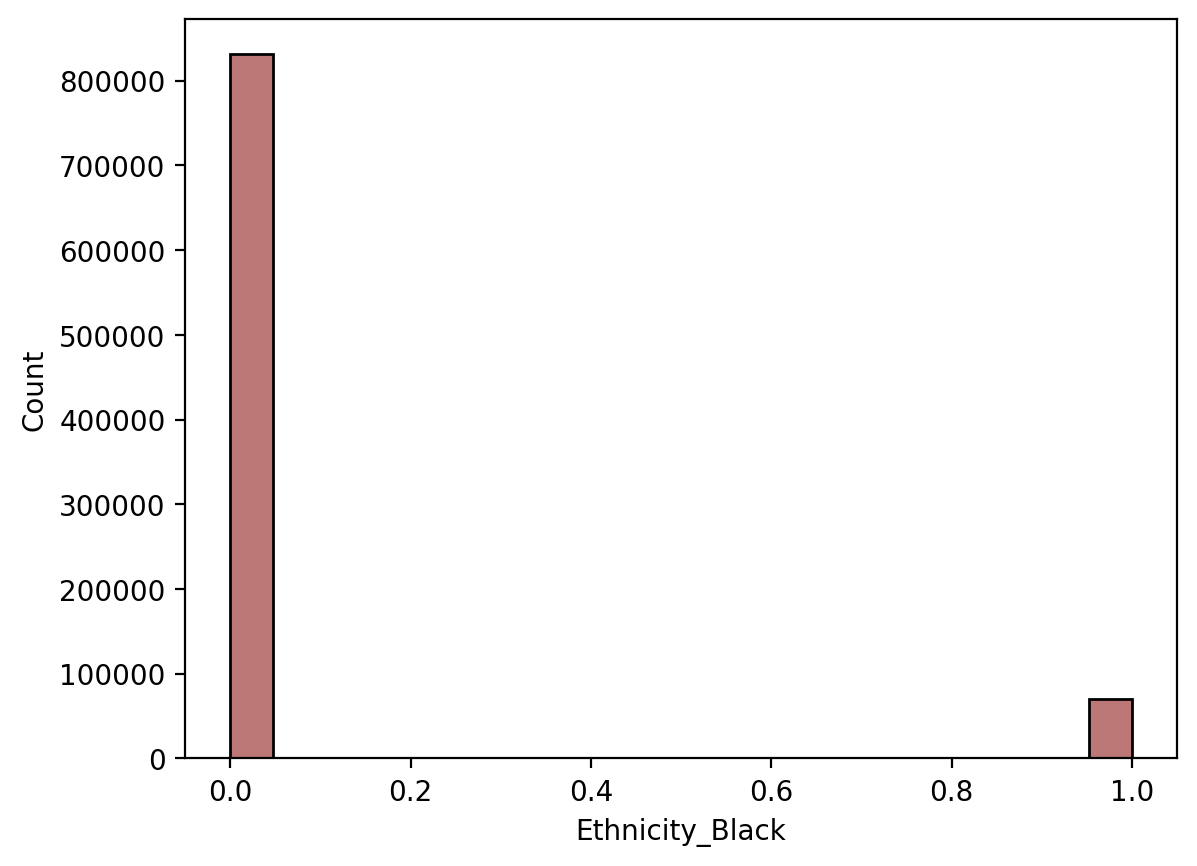

Ethnicity_Mixed


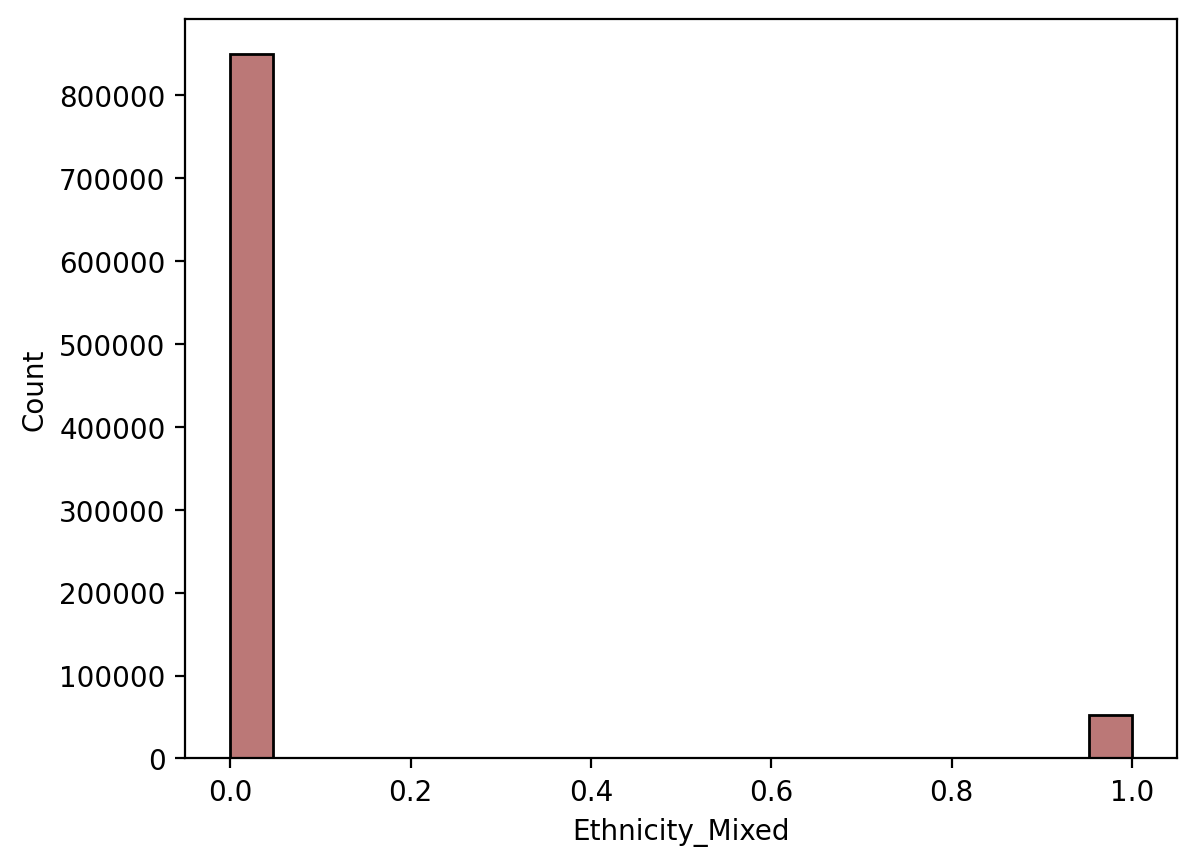

Ethnicity_Other


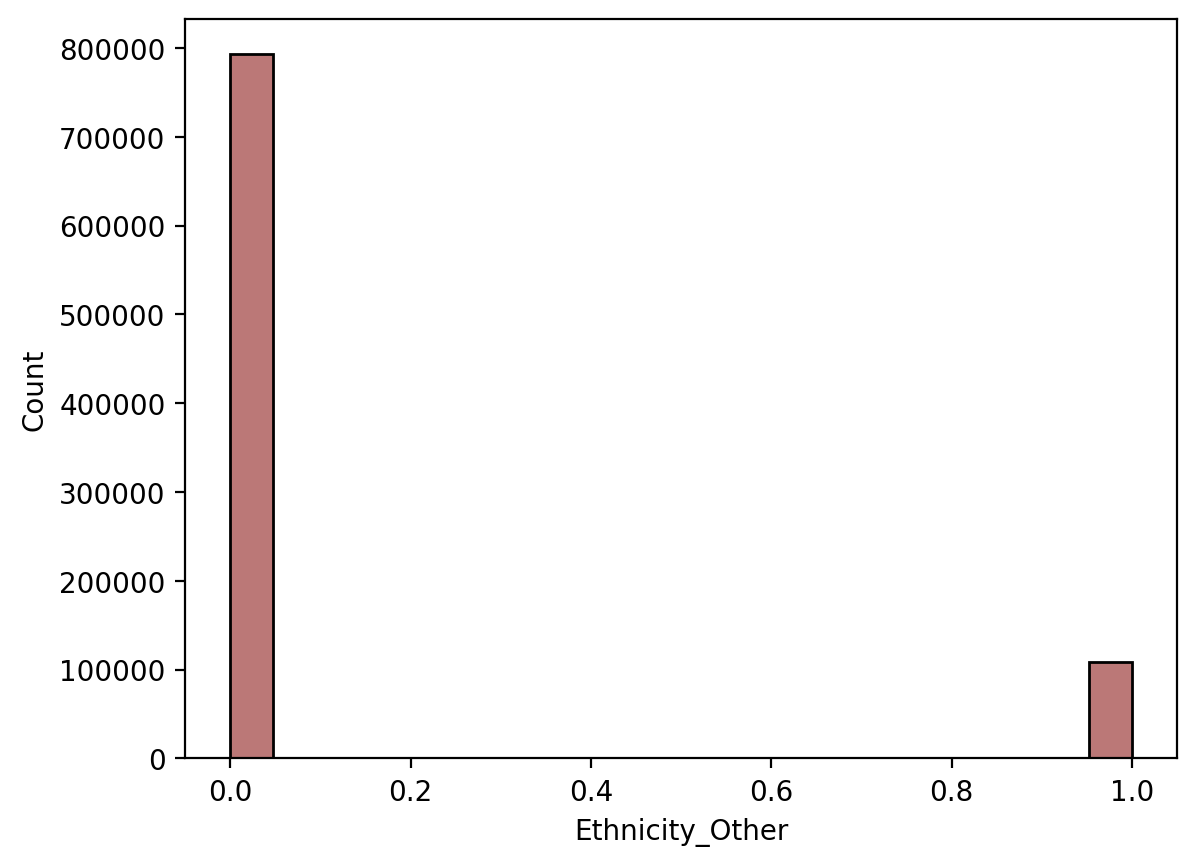

Ethnicity_White


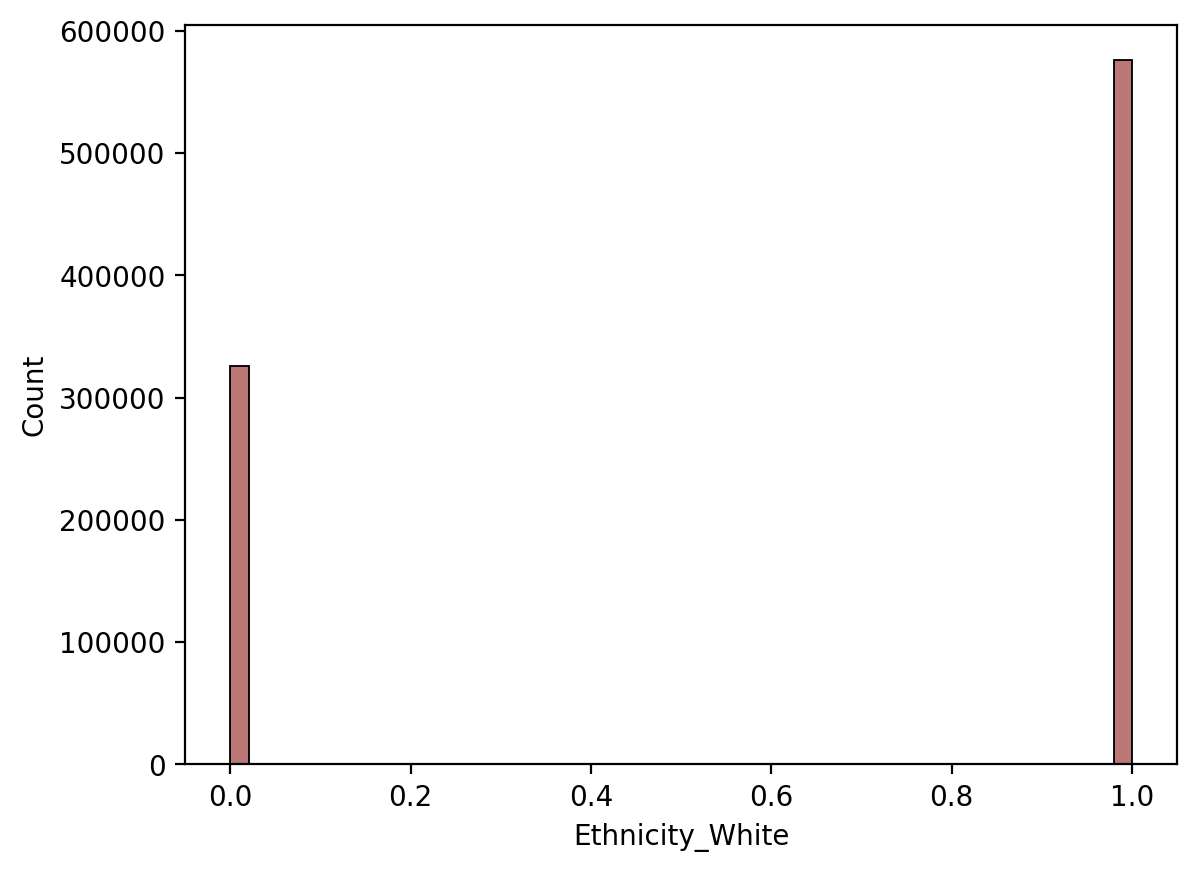

In [66]:
# Select columns with numeric data types
numeric_columns = data.select_dtypes(include=['number']).columns

# Convert to list
numeric_columns_list = numeric_columns.tolist()

for n in numeric_columns_list:
    print(n)
    sns.histplot(data=data, x=n, color='#a54b49')
    plt.show()

In [2]:
data = make_full_preprocess_data()

==== Preparing Global Disease Register + IMD2023 info ==========================
💊 ECS Disease Register completed  - ECS IMD2023 added
💊 TCP Disease Register completed  - TCP IMD2023 added
💊 TGP Disease Register completed  - TGP IMD2023 added
💊 SMW Disease Register completed  - SMW IMD2023 added
💊 KMC Disease Register completed  - KMC IMD2023 added
💊 HPVM Disease Register completed  - HPVM IMD2023 added
🔂 Concat Registers
❌ Drop NaN
💾 Saving to output_data/global_disease_register.csv...
✅ Done in 7.54 sec (74420, 22)

==== Processing Appointments data + Add 🌤️ + merge disease_register ===========
⏺️ ECS - df 1  df 2  df 3  df 4  df 5  df 6  df 7  df 8  df 9  duplicates: 0
⏺️ TCP - df 1  df 2  df 3  df 4  df 5  df 6  df 7  df 8  df 9  duplicates: 0
⏺️ TGP - df 1  df 2  df 3  df 4  df 5  df 6  df 7  df 8  df 9  duplicates: 0
⏺️ SMW - df 1  df 2  df 3  df 4  df 5  df 6  df 7  df 8  df 9  duplicates: 0
⏺️ KMC - df 1  df 2  df 3  df 4  df 5  df 6  df 7  df 8  df 9  duplicates: 0
⏺️ HPVM - d

In [60]:
from showupforhealth.params import *
from showupforhealth.ml_functions.data import *
from showupforhealth.ml_functions.preprocessor import *

In [63]:
data = pd.read_csv(f'{OUTPUT_DATA}full_preprocess_data.csv')

In [64]:
df = feature_engineering(data)
df.head()

=== Feature Engineering =============================================================
➡️ Rename Columns
➡️ Drop deseased and deducted
➡️ Columns to Datetime
➡️ Fix Appointment Time
➡️ Map Appointment Status
➡️ book_to_app_days
➡️ booked_by_clinician
➡️ Extract Rota Types
➡️ registered_for_months
➡️ Week
➡️ month
➡️ day of week
➡️ Convert Cyclical data
➡️ Adding NO Shows Column
➡️ Drop Column no longer needed
➡️ Rows dropped from Rotas other than spec: 6679
➡️ Rows from with Negative book_to_app_days: 323
➡️ Labelencode Column Sex
➡️ OneHotEncode Column Rota
➡️ Extract Ethnicity Category
➡️ OneHotEncode Ethnicity
💾 Saving to output_data/full_train_data.csv...
✅ Done in 17.89 sec (901516, 37)


,Appointment_status,temp,precipitation,Age,Sex,FRAILTY,DEPRESSION,OBESITY,IHD,DM,HPT,NDHG,SMI,IMD2023,dist_to_station,distance_to_surg,book_to_app_days,booked_by_clinician,registered_for_months,sin_week,cos_week,sin_Appointment_time,cos_Appointment_time,sin_month,cos_month,sin_day_of_week,cos_day_of_week,No_shows,Rota_ARRS,Rota_GP,Rota_HCA,Rota_Nurse,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed,Ethnicity_Other,Ethnicity_White
0,1,17.7,0.0,40,0,0.00,0,0,0,0,0,0,0,22698.0,0.519419,0.816996,54.0,1,17.0,-0.120537,-0.992709,0.707107,-0.707107,-0.5,-0.866025,0.781831,0.623490,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,18.5,0.0,70,2,0.39,0,1,0,1,1,0,0,10169.0,0.540792,1.656309,49.0,0,12.0,-0.120537,-0.992709,0.500000,-0.866025,-0.5,-0.866025,0.781831,0.623490,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1,18.5,0.0,70,2,0.39,0,1,0,1,1,0,0,10169.0,0.540792,1.656309,49.0,0,12.0,-0.120537,-0.992709,0.500000,-0.866025,-0.5,-0.866025,0.781831,0.623490,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1,19.4,0.0,66,2,0.03,1,0,0,0,1,0,0,8243.0,0.332691,0.600495,37.0,0,70.0,-0.120537,-0.992709,0.258819,-0.965926,-0.5,-0.866025,0.433884,-0.900969,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,18.3,0.0,58,0,0.11,0,1,0,0,0,0,0,7626.0,0.155802,0.215224,27.0,0,28.0,-0.120537,-0.992709,0.707107,-0.707107,-0.5,-0.866025,0.433884,-0.900969,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


<Axes: xlabel='registered_for_months', ylabel='Count'>

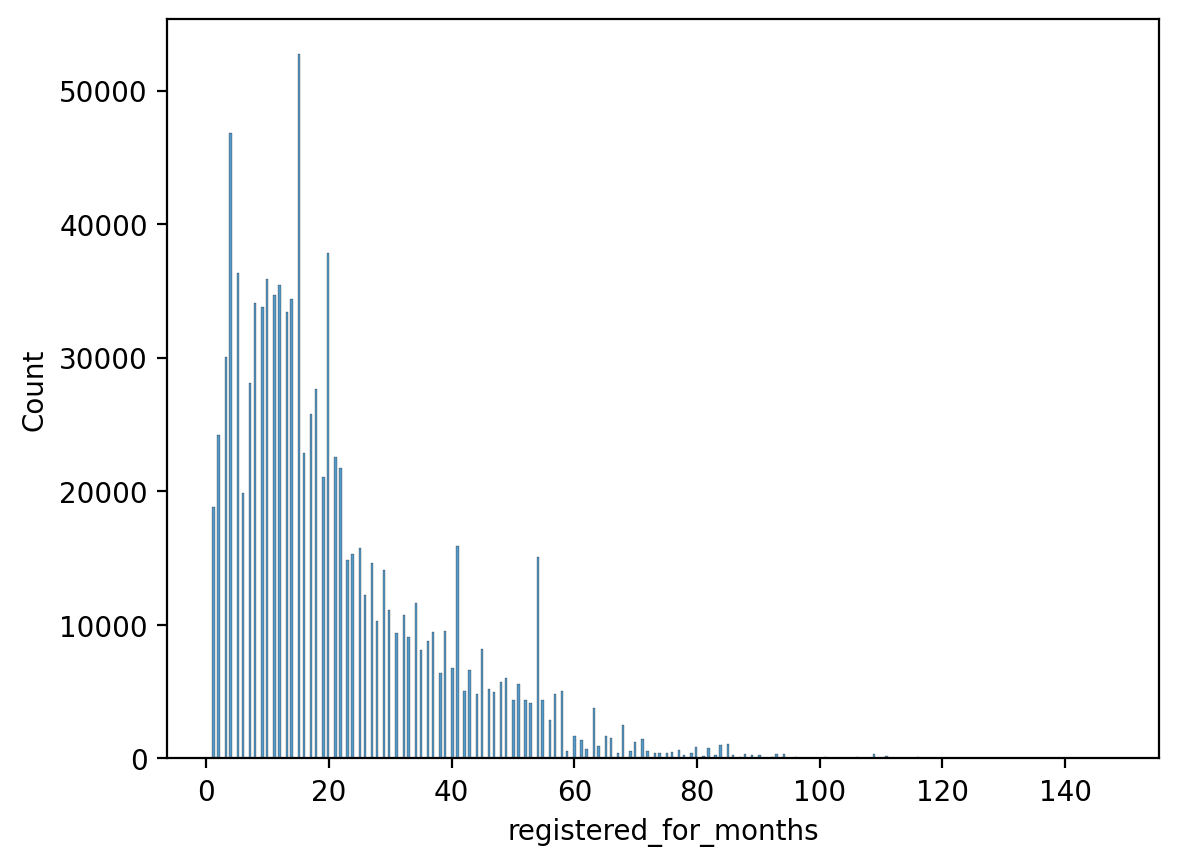

In [59]:

sns.histplot(df['registered_for_months'])

In [34]:
df.shape

(1018707, 40)